## Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# statistical tests libraries
from scipy.stats import levene
from scipy.stats import mannwhitneyu
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as sfa

## Load dataset

In [3]:
data= pd.read_csv("vehicles.csv")

## Shape of the data

In [5]:
data.shape

(426880, 26)

In [6]:
pd.options.display.max_columns = 100
data.iloc[500:,].head(5)  # as we have nan values at the begning.

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
500,7313794897,https://bham.craigslist.org/ctd/d/tuscaloosa-2...,birmingham,https://bham.craigslist.org,12977,2011.0,lexus,rx,NaN,NaN,gas,140994.0,clean,automatic,2T2BK1BA6BC090077,NaN,NaN,NaN,NaN,https://images.craigslist.org/00W0W_llwwNpkdrq...,Contemporary Automotive address: 3427 Skyla...,NaN,al,33.168322,-87.491902,2021-04-28T09:10:58-0500
501,7313781903,https://bham.craigslist.org/ctd/d/fort-ogletho...,birmingham,https://bham.craigslist.org,12995,2008.0,ford,f150 xl,NaN,NaN,gas,93146.0,clean,automatic,1FTRF12V98KD94523,NaN,NaN,NaN,green,https://images.craigslist.org/00O0O_dq7Varo7VC...,** 2008 FORD F150 XL * V8 * EXT CAB * CAMPER ...,NaN,al,34.950600,-85.243200,2021-04-28T08:44:19-0500
502,7313781430,https://bham.craigslist.org/ctd/d/fort-ogletho...,birmingham,https://bham.craigslist.org,36995,2012.0,ford,f250 super duty 4x4,NaN,NaN,gas,41364.0,clean,automatic,1FD7X2B65CEC58024,4wd,NaN,NaN,silver,https://images.craigslist.org/00606_7ArnvQe5rw...,** 2012 FORD F250 SD * 41K MILES * EXT CAB * U...,NaN,al,34.950600,-85.243200,2021-04-28T08:43:21-0500
503,7313781284,https://bham.craigslist.org/ctd/d/fort-ogletho...,birmingham,https://bham.craigslist.org,31995,2017.0,ford,f350 super duty,NaN,NaN,gas,129638.0,clean,automatic,1FD8W3G69HEB28454,NaN,NaN,NaN,white,https://images.craigslist.org/00a0a_iJk9cxR04X...,** 2017 FORD SD F350 * CREW CAB * FLAT BED * D...,NaN,al,34.950600,-85.243200,2021-04-28T08:43:05-0500
504,7313781180,https://bham.craigslist.org/ctd/d/fort-ogletho...,birmingham,https://bham.craigslist.org,25995,2015.0,gmc,sierra 2500hd,NaN,NaN,gas,126690.0,clean,automatic,1GT21XEG0FZ537816,NaN,NaN,NaN,red,https://images.craigslist.org/00j0j_6MMzGwI5gq...,** 2015 GMC SIERRA 2500 HD * CREW CAB * LONGBE...,NaN,al,34.950600,-85.243200,2021-04-28T08:42:50-0500


In [7]:
# dataset columns

data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [8]:
# Info treatment

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

#### Observations:
* Here year and posting date column's have wrong data type, So we change the datatype of these columns.

In [9]:
# Changing data types
data.posting_date = pd.to_datetime(data.posting_date,utc=True)

### Five Point Summary

In [10]:
data.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


#### Observations:
* Minimum value in price is 0, So there are some 0 values present in our target variable.
* Minimum value in odometer is also 0, So there are also some 0 values present.

### Checking for null values

In [11]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = data.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns

print('Missing Values')
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', '%'])    
missing_data

Missing Values


,Total,%
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753


### Droping Unnecessory columns
* Id - It has only unique values, so it don't give any useful information.
* Region url, Image url- They contains the web links.
* county - It has 100% null values. 
* Lat, Long - They have the cordinates of the location of the car and they don't implies any useful information.

In [12]:
data.drop(['id','region_url','county','image_url','lat','long'],axis =1,inplace = True)

### Droping records
* Droping the records which have greater than 15 null values in a single record.

In [13]:
data.shape

(426880, 20)

In [14]:
# Dropping the duplicates records on the basis of following columns.

data.drop_duplicates(subset=['price','year','manufacturer','model','condition','cylinders','fuel','odometer',
                             'title_status','transmission','VIN','drive','size','type','paint_color','state'],
                     keep = 'first',inplace = True)

In [15]:
data.shape

(299509, 20)

In [16]:
# .isnull().sum(axis = 1) gives the sum of all the null values row wise.

car = data.loc[data.isnull().sum(axis = 1)<15]   

# 

In [17]:
car[car.price==0].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
46,https://auburn.craigslist.org/ctd/d/auburn-999...,auburn,0,2011.0,jeep,compass,excellent,NaN,gas,99615.0,clean,automatic,NaN,NaN,full-size,SUV,NaN,Call or text now 800-213-0336 Open 9:00-6:00pm...,al,2021-04-30 21:35:11+00:00
126,https://auburn.craigslist.org/ctd/d/ozark-2018...,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,"2018 Chevrolet Express Cargo Van RWD 2500 135""...",al,2021-04-12 16:20:35+00:00
127,https://auburn.craigslist.org/ctd/d/ozark-2019...,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,"2019 Chevrolet Express Cargo Van RWD 2500 135""...",al,2021-04-12 16:20:00+00:00


In [18]:
# finding the count of values where car price is 0

car[car.price==0].price.count()

20070

* Target variable has some 0 values which make no sense for a car price.
* So we make this dataset as test data.

In [19]:
car[car.price<500].shape[0]

25659

In [20]:
absurd_data = car[car.price<500]
absurd_data = absurd_data.drop('price',axis = 1,inplace = True)  # we can take it as unseen data.

In [21]:
car = car[car.price!=0]

# 

# Univariate analysis

### Target variable

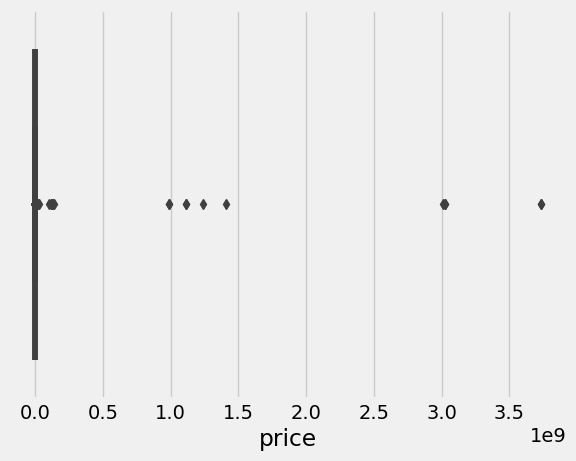

In [22]:
# Boxplot

sns.boxplot(car.price)
plt.show()

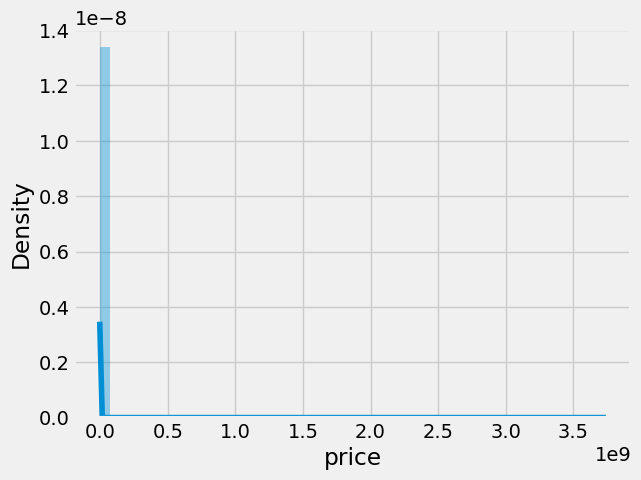

In [23]:
# distribution plot

sns.distplot(car.price)
plt.show()

In [25]:
# Summary statistics of the data to visualize the target variable better
car.price.describe()

count    2.793840e+05
mean     1.056718e+05
std      1.505829e+07
min      1.000000e+00
25%      6.500000e+03
50%      1.390000e+04
75%      2.525000e+04
max      3.736929e+09
Name: price, dtype: float64

#### Observations :
* Target variable has absurdly very low values.
* There are very much high price of some cars.

In [26]:
q1 = car.price.quantile(0.25)
q3 = car.price.quantile(0.75)

iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
upper_limit

53375.0

In [27]:
# 1st having price range from 500 to 57,000.
# 2nd having price range above 57,000. 

car1 = car.loc[(car.price >500) & (car.price <= 57000),]
car2 = car.loc[car.price > 57000,]

In [28]:
car1.head(2)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00


In [29]:
car2.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
204,https://bham.craigslist.org/ctd/d/tuscaloosa-2...,birmingham,58977,2019.0,gmc,sierra 3500,NaN,NaN,gas,66368.0,clean,automatic,1GT42WEY6KF184860,4wd,NaN,NaN,white,Contemporary Automotive address: 3427 Skyla...,al,2021-05-04 14:11:35+00:00
280,https://bham.craigslist.org/cto/d/trussville-1...,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,al,2021-05-02 18:24:09+00:00
346,https://bham.craigslist.org/ctd/d/cleveland-20...,birmingham,98900,2001.0,ferrari,360 modena,good,8 cylinders,gas,20187.0,clean,automatic,ZFFYT53A110125703,rwd,mid-size,convertible,red,"2001 Ferrari 360 Modena Spider - $98,900 Year:...",al,2021-05-01 13:48:02+00:00


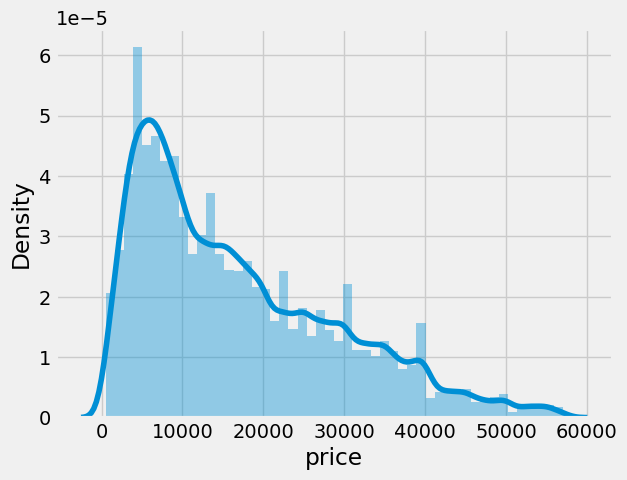

In [30]:
# distribution plot for car1

sns.distplot(car1.price)
plt.show()

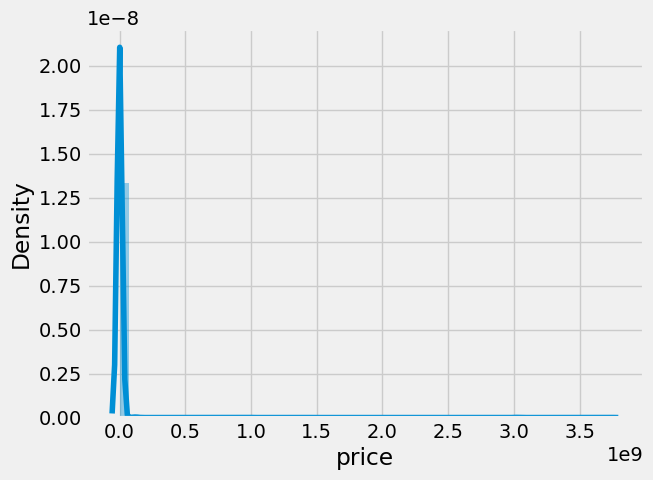

In [31]:
# distribution plot for car2

sns.distplot(car2.price)
plt.show()

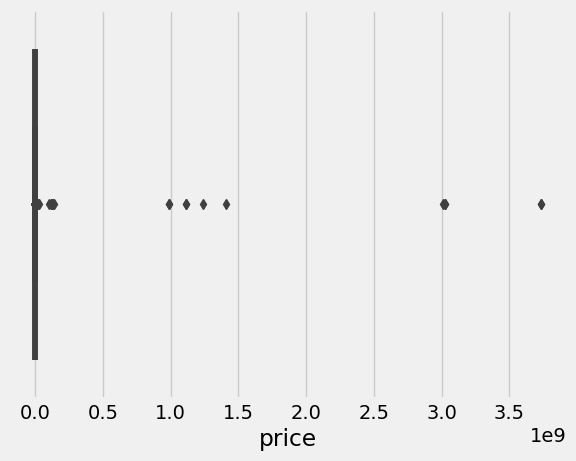

In [32]:
# Boxplot for car2

sns.boxplot(car2.price)
plt.show()

### Price

* most listed used car prices are between 5,000 to 15,000 for car1 dataset.
* most listed used car prices are between 57,000 to 70,000 for car2 dataset.

In [33]:
# unique values in categorical columns of Car1 dataset.

{column:len(car1[column].unique()) for column in car1.columns if car1.dtypes[column]=='object'} 

{'url': 267656,
 'region': 404,
 'manufacturer': 43,
 'model': 26670,
 'condition': 7,
 'cylinders': 9,
 'fuel': 6,
 'title_status': 7,
 'transmission': 4,
 'VIN': 100526,
 'drive': 4,
 'size': 5,
 'type': 14,
 'paint_color': 13,
 'description': 253443,
 'state': 51}

In [34]:
# unique values in categorical columns of car2 dataset.

{column:len(car2[column].unique()) for column in car2.columns if car2.dtypes[column]=='object'} 

{'url': 5635,
 'region': 333,
 'manufacturer': 33,
 'model': 1584,
 'condition': 6,
 'cylinders': 9,
 'fuel': 6,
 'title_status': 7,
 'transmission': 4,
 'VIN': 2337,
 'drive': 4,
 'size': 5,
 'type': 14,
 'paint_color': 13,
 'description': 4610,
 'state': 51}

#### Seperating Columns in Numerical and Categorical for univariate and bivariate analysis.

In [35]:
car.columns

Index(['url', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'description', 'state',
       'posting_date'],
      dtype='object')

In [36]:
num_cols = ['price','odometer']

cat_cols = ['region','year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'posting_date']

# 

### Univariate Analysis for Numerical columns

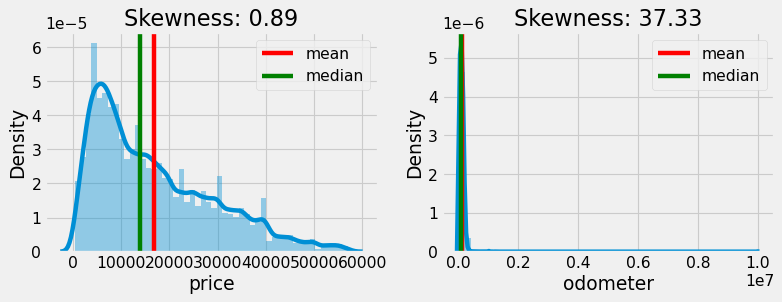

In [37]:
# Plotting all numerical columns/variables (all together using loop) for car1 dataset.

t = 1
plt.figure(figsize = (10,4),dpi=80)
for i in num_cols:
    plt.subplot(1,2,t)  # ---------for plotting 2 plots in a figure
    sns.distplot(car1[i])   #----- for ditribution plot
    plt.title(i)
    plt.axvline(car1[i].mean(),color='r',label='mean')    # -------- to draw the mean line 
    plt.axvline(car1[i].median(),color='g',label='median')  #---------- to draw the median line.
    plt.legend()

    plt.title('Skewness: %.2f'%car1[i].skew())
    t+=1

plt.tight_layout()
plt.show()

In [38]:
car1.loc[car1.odometer==0].shape[0]

713

In [39]:
car1[car1.odometer>1000000].shape[0]

375

###### Observations:
* Price is right skewed.
* There are some cars having odometer reading greater than 10 lakh which will be considered as misleading values because
    maximum reading in a odometer can be upto 10 lakh only.

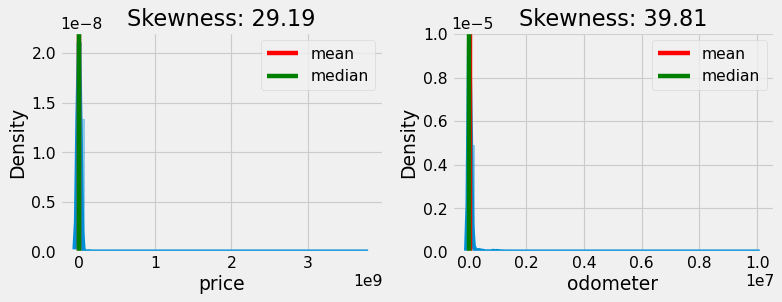

In [40]:
# Plotting all numerical columns/variables (all together using loop) for car2 dataset.

t = 1
plt.figure(figsize = (10,4),dpi=80)
for i in num_cols:
    plt.subplot(1,2,t)
    sns.distplot(car2[i])
    plt.title(i)
    plt.axvline(car2[i].mean(),color='r',label='mean')
    plt.axvline(car2[i].median(),color='g',label='median')
    plt.legend()

    plt.title('Skewness: %.2f'%car2[i].skew())
    t+=1

plt.tight_layout()
plt.show()

###### Observations:
* In odometer, there are some values greater than 10 lakh which will be considered as misleading values because
    maximum reading in a odometer can be upto 10 lakh only and some 0 are also present.

### Univarite Analysis for Categorical columns

#### 1. Regions

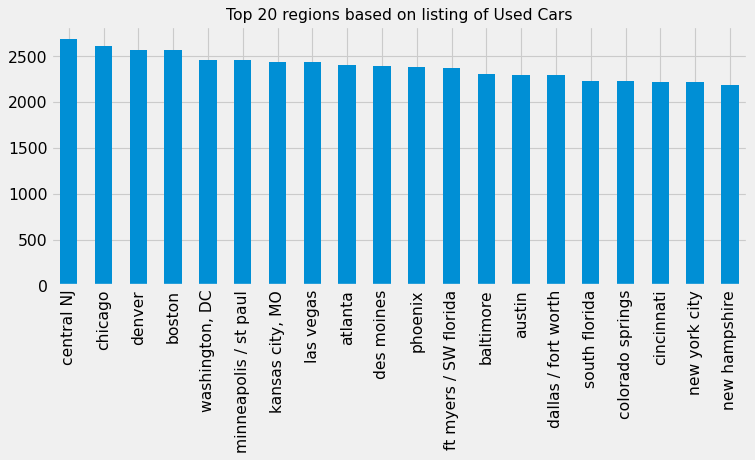

In [41]:
# As plotting 400+ regions is very resource heavy task, we plot top 20 regions here to get an idea

# 1. Top 20 regions

plt.figure(figsize=(10,4),dpi = 80) 
car1['region'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 regions based on listing of Used Cars',fontsize=14)
plt.show()

###### Inference:
* Central Nj have highest number of listed used cars.

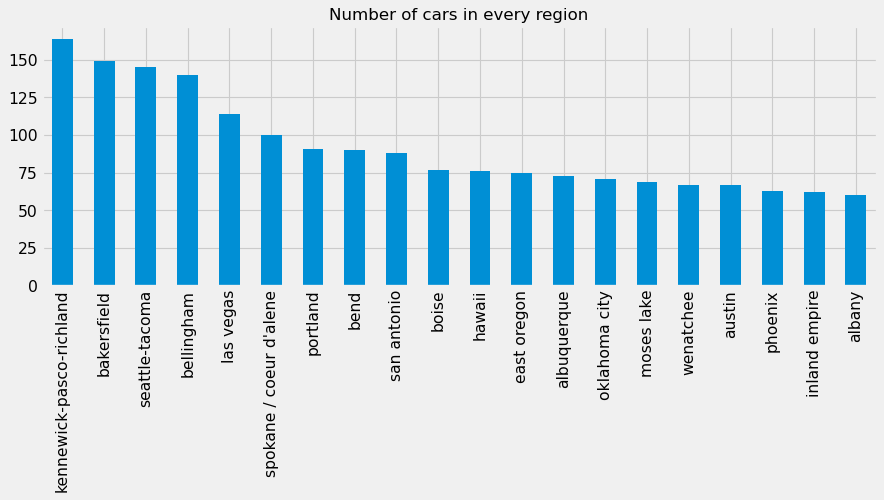

In [42]:
# Regions in car2 datset.

plt.figure(figsize=(12,4),dpi=80) 
car2['region'].value_counts()[:20].plot(kind='bar')
plt.title('Number of cars in every region',fontsize=15)
plt.show()

##### Inference:
* Kennewick-pasco-richland has maximum number of premium price cars  
  followed by bakersfield,Seattle-tacoma and bellingham.

#### 2. Manufacturer

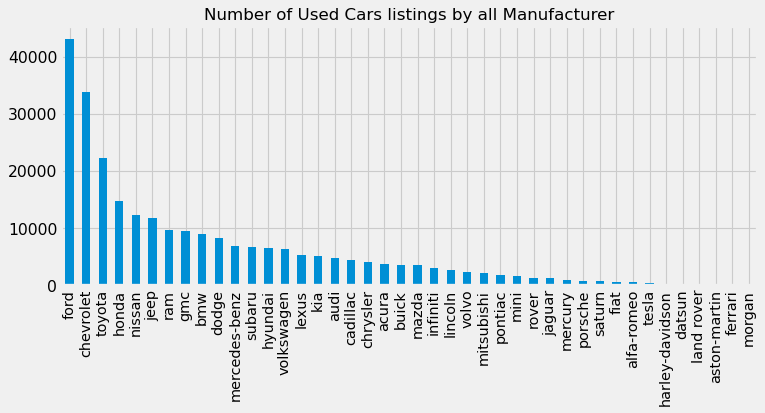

In [43]:
# Countplot for manufacturer for car1

plt.figure(figsize=(10,4),dpi=80)
car1.manufacturer.value_counts().plot(kind='bar')
plt.xticks(rotation = 90,fontsize = 13)
plt.title('Number of Used Cars listings by all Manufacturer',fontsize=15)
plt.show()

##### Inference:
* The top 3 most popular listed used car manufacturers are ford, chevrolet, and toyota while the least 3 are morgon,ferrari and aston-martin.

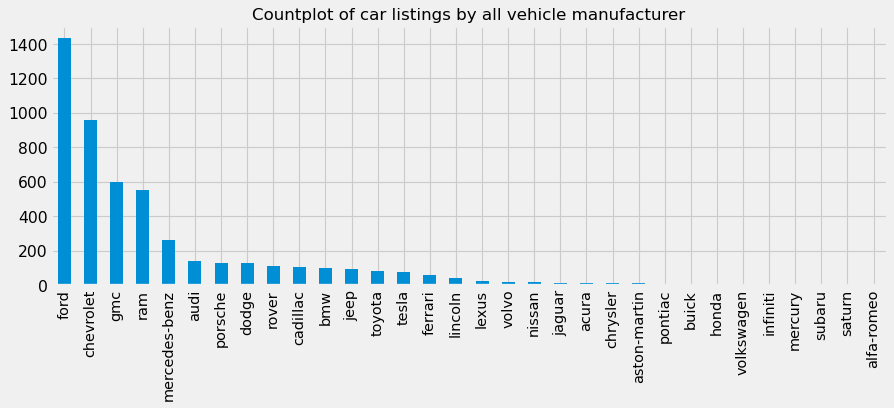

In [44]:
# Countplot for manufacturer for car2

plt.figure(figsize=(12,4),dpi=80)
car2.manufacturer.value_counts().plot(kind='bar')
plt.xticks(rotation = 90,fontsize=13)
plt.title('Countplot of car listings by all vehicle manufacturer',fontsize=15)
plt.show()

##### Inference:
* Most of the premium used cars are manufactured by ford.
  
  The top 3 most popular listed used car manufacturers are ford, chevrolet, and gmc while the least 3 are Alfa-romeo, Saturn and Subaru.

#### 3. Models

In [45]:
# 3. count of models
car1.model.nunique()

26669

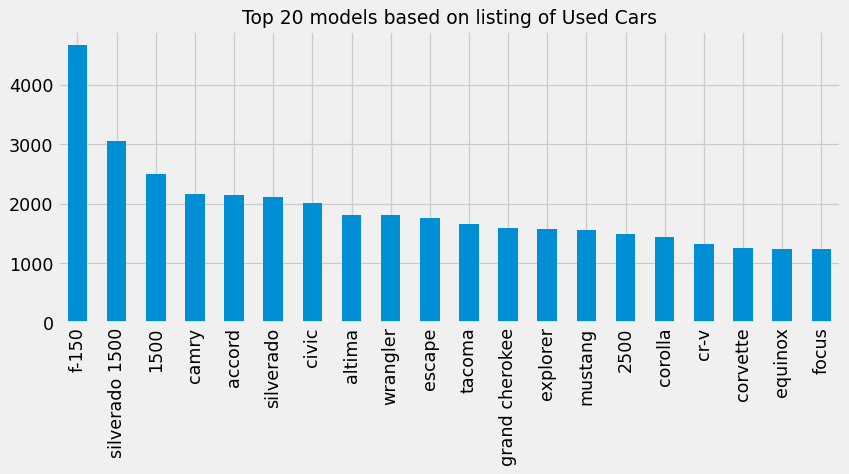

In [46]:
# as plotting 27000 + models is not feasible, we plot the top 10 models here to get an idea

# 3. Top 20 models for car1

plt.figure(figsize=(10,4),dpi=90) 
car['model'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 models based on listing of Used Cars',fontsize = 15)
plt.show()

##### Inference:
* f-150 model car is highest listed in the used car market 
  
  which belongs to Ford.

In [47]:
# 3. count of models
car2.model.nunique()

1583

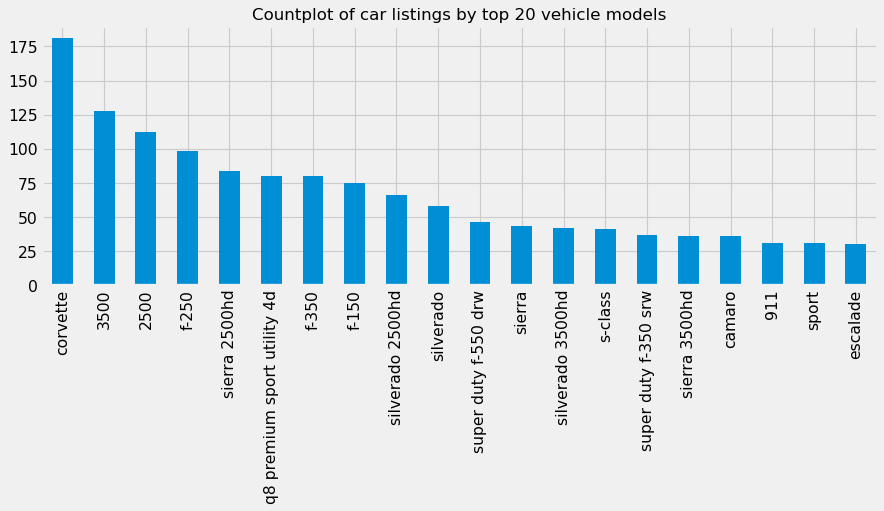

In [48]:
# 3. Top 20 models for car2

plt.figure(figsize=(12,4),dpi=80) 
car2['model'].value_counts()[:20].plot(kind='bar')
plt.title('Countplot of car listings by top 20 vehicle models',fontsize = 15)
plt.show()

##### Inference:
* In premium price cars, Corvette model is frequently appeared
  
  which belongs to Chevrolet.

#### 4. Condition

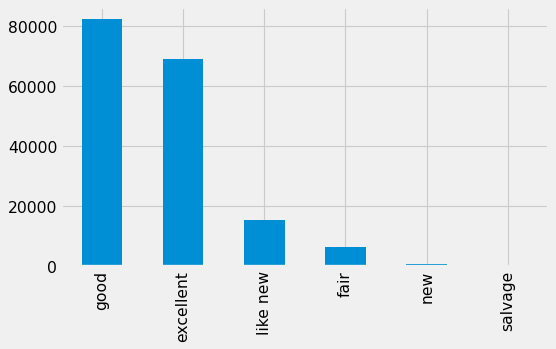

In [49]:
# Countplot for Condition of car1

plt.figure(figsize=(7,4),dpi=80) 
car1['condition'].value_counts().plot(kind='bar')
# plt.title('Car conditions distribution',fontsize=15)
plt.show()

###### Inferences:
* Good condition car is most listed which contributed around 50% of the distribution

  followed by excellent condition which contriutes around 38%.

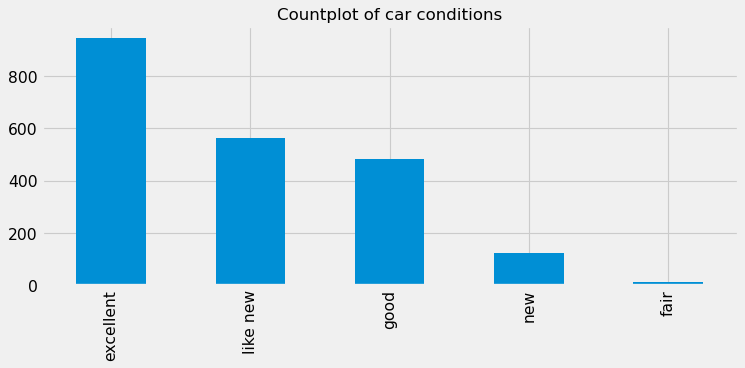

In [50]:
# Countplot for Condition of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['condition'].value_counts().plot(kind='bar')
plt.title('Countplot of car conditions',fontsize=15)
plt.show()

##### Inferences:
   * In premium cars most of the cars have excellent condition,
   
     which contributes around 48% of the total distribution of condition in used car market .

#### 5. Cylinders

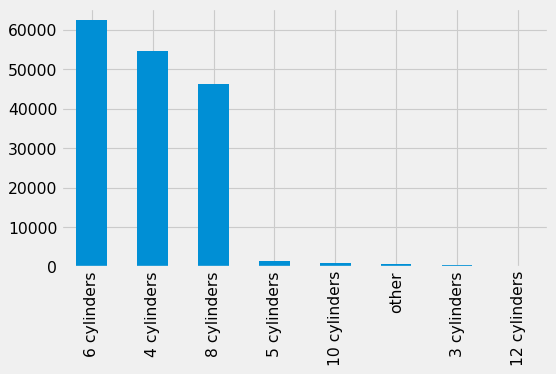

In [51]:
# Countplot for Cylinders of car1

plt.figure(figsize=(7,4),dpi=80) 
car1['cylinders'].value_counts().plot(kind='bar')
# plt.title('Car cylinders distribution',fontsize=15)
plt.show()

##### Inferences:
   * Cars with 6, 4, and 8 cylinders are the most popular listed in used car market.
     
     This is expected because most cars are equipped with cylinders in that range.

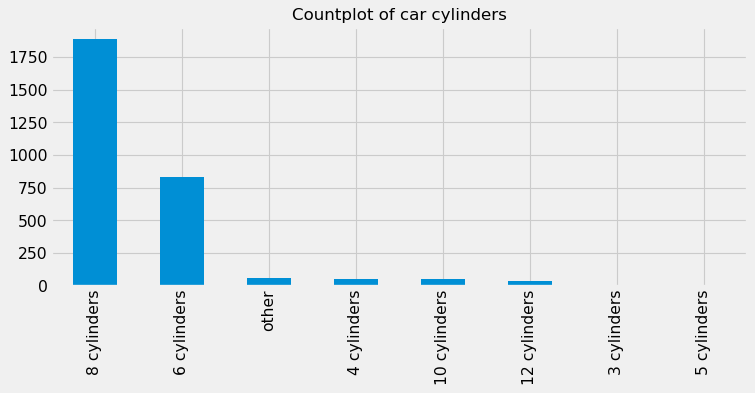

In [52]:
# Countplot for Cylinders of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['cylinders'].value_counts().plot(kind='bar')
plt.title('Countplot of car cylinders',fontsize=15)
plt.show()

##### Inferences:
   * Maximum premium cars have 8 cylinders.

#### 6. Fuel

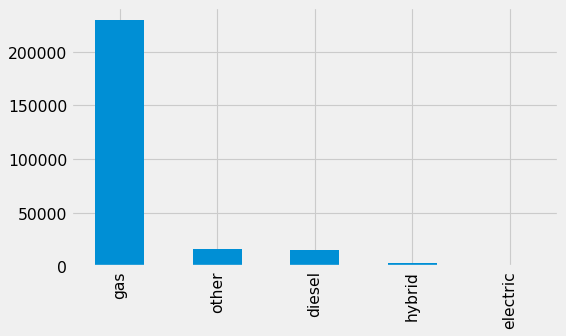

In [53]:
# Countplot for fuel for car1

plt.figure(figsize=(7,4),dpi=80)
car1['fuel'].value_counts().plot(kind='bar')
# plt.title('Cars fuel type distribution',fontsize=15)
plt.show()

##### Inferences :
   * Most of the cars whose price range is between 500 to 57000 have fuel type 'gas.
     
     As expected, gas or petrol is the most common type of fuel for the listed cars. 
   
   
   * Very few of them are electric cars.

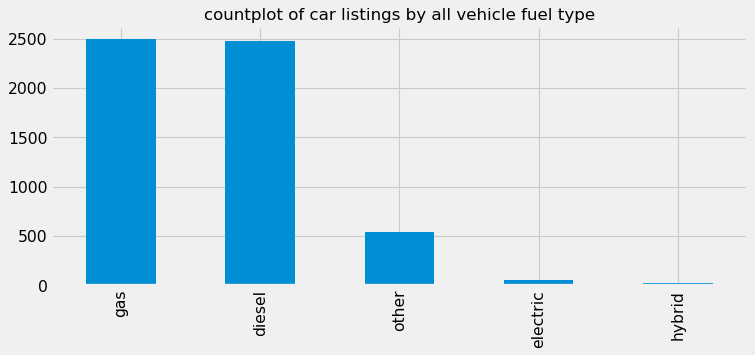

In [54]:
# Countplot for fuel for car2

plt.figure(figsize=(10,4),dpi=80)
car2['fuel'].value_counts().plot(kind='bar')
plt.title('countplot of car listings by all vehicle fuel type',fontsize=15)
plt.show()

##### Inferences:
   * Most of the Premium cars have  fuel type 'gas'.
   * There are less electric and hybrid premium cars in premium segment.

#### 7. Title Status

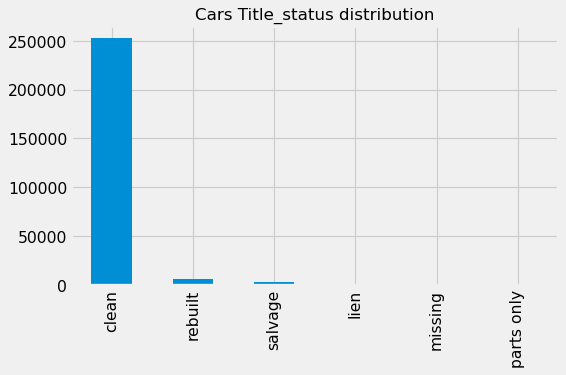

In [55]:
# Countplot for title_status for car1

plt.figure(figsize=(7,4),dpi=80)
car1['title_status'].value_counts().plot(kind='bar')
plt.title("Cars Title_status distribution",fontsize=15)
plt.show()

##### Inferences:
* Most of the cars status is clean.
* Cars having price range between 500 to 57000 have car's title_status in following order :-
                  clean > rebuilt > salvage > lien > missing > parts only

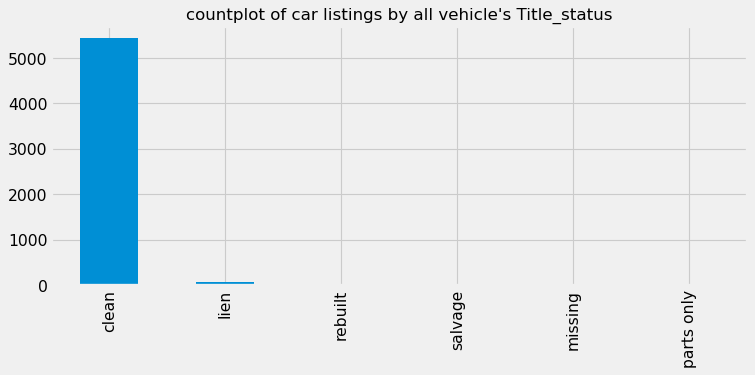

In [56]:
# Countplot for title_status for car2

plt.figure(figsize=(10,4),dpi=80)
car2['title_status'].value_counts().plot(kind='bar')
plt.title("countplot of car listings by all vehicle's Title_status",fontsize=15)
plt.show()

##### Inferences:
* Most of the premium cars have status clean.
* Premium cars title_status is in following order :-
            clean > missing > salvage > rebuilt > lien > parts only

#### 8. Transmission

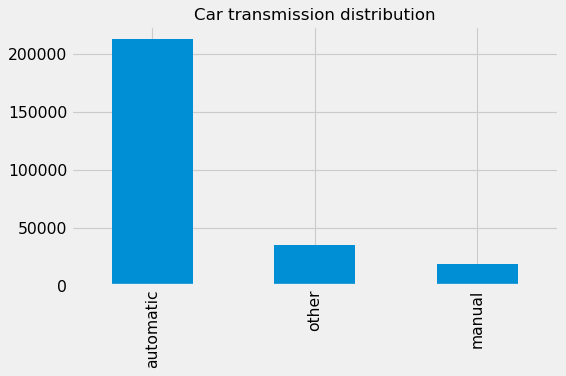

In [57]:
# countplot of the transmission varibale of car1

plt.figure(figsize=(7,4),dpi = 80) 
car1['transmission'].value_counts().plot(kind='bar')
plt.title('Car transmission distribution',fontsize = 15)
plt.show()

##### Inference:
* The most common car transmission type is automatic as expected.
* Manual cars are the least

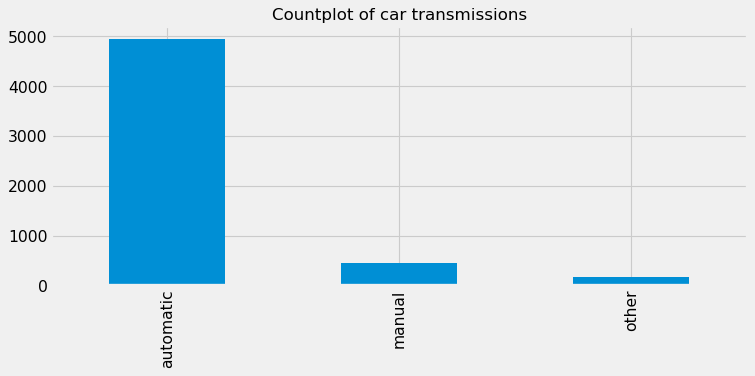

In [58]:
# countplot the transmission varibale of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['transmission'].value_counts().plot(kind='bar')
plt.title('Countplot of car transmissions',fontsize = 15)
plt.show()

##### Inference:
* In premium cars too ,Automatic cars are found the most.
* And  Manual cars are the least 

#### 9. Drive

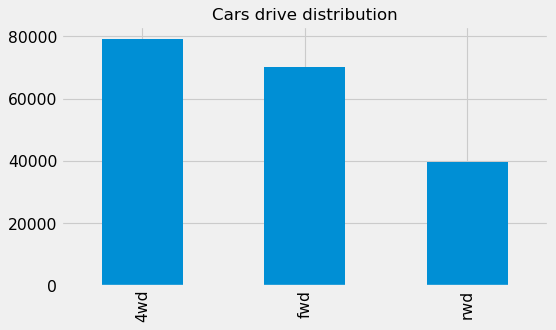

In [59]:
# countplot of the drive varibale of car1

plt.figure(figsize=(7,4),dpi=80) 
car1['drive'].value_counts().plot(kind='bar')
plt.title('Cars drive distribution',fontsize = 15)
plt.show()

##### Inference:
* 4 wheel drive is the most  commonly found car drive followed by front wheel drive 
* Rear wheel drive is the least found cra drive in used car market 1

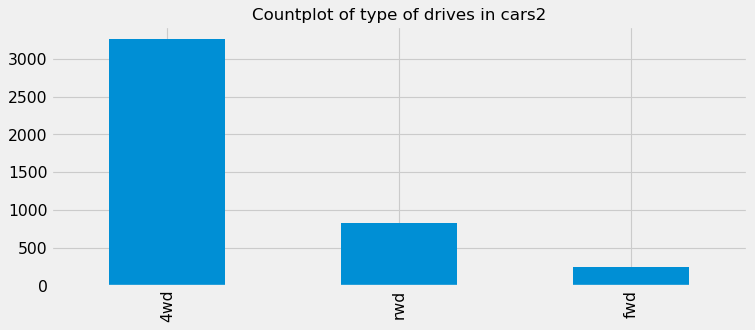

In [60]:
# countplot of the drive varibale of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['drive'].value_counts().plot(kind='bar')
plt.title('Countplot of type of drives in cars2',fontsize = 15)
plt.show()

##### Inference:
* 4 wheel drive is the most  commonly found car by a large margin in premium cars
* Rear wheel drive and Front wheel drive counts are very low in used premium car market

#### 10. Size

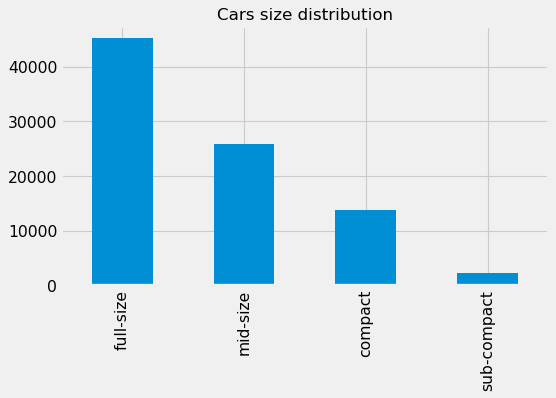

In [61]:
# countplot of the size varibale of car1

plt.figure(figsize=(7,4),dpi=80) 
car1['size'].value_counts().plot(kind='bar')
plt.title('Cars size distribution',fontsize = 15)
plt.show()

##### Inferences:
* Full-size cars are most listed in used car market.
  
  Genearlly, sedan type cars are considerd as full-sized cars in USA. 

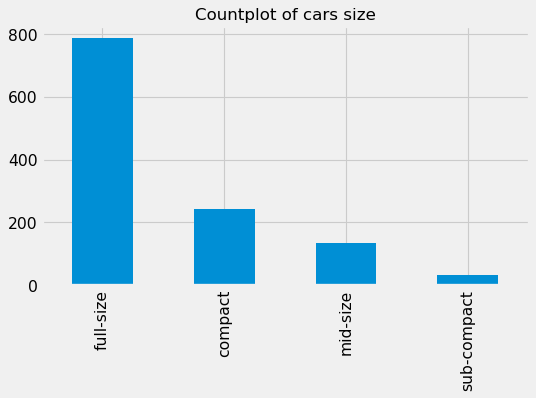

In [62]:
# countplot of the size varibale of car2

plt.figure(figsize=(7,4),dpi=80) 
car2['size'].value_counts().plot(kind='bar')
plt.title('Countplot of cars size',fontsize = 15)
plt.show()

##### Inferences:
* Full size cars have the most and sub-compact size are least popular in listed premium used car.

#### 11. Type

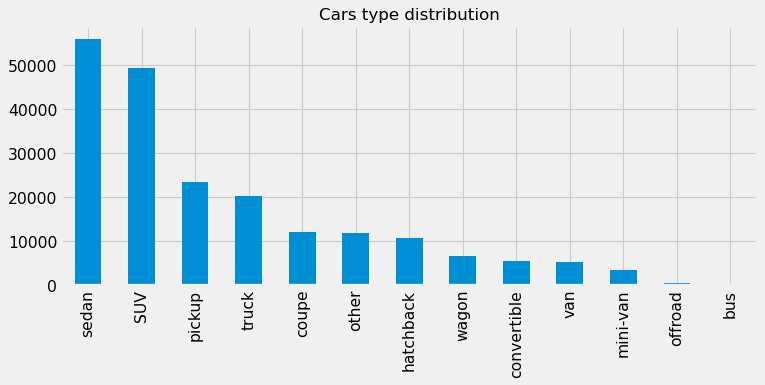

In [63]:
# countplot of the type varibale of car1

plt.figure(figsize=(10,4),dpi=80) 
car1['type'].value_counts().plot(kind='bar')
plt.title('Cars type distribution',fontsize = 15)
plt.show()

##### Inferences:
* Sedans, SUVs are the two most popular car listings followed by pickups and trucks.

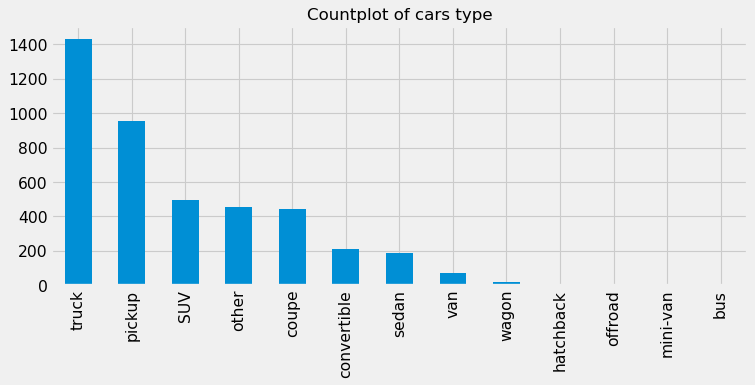

In [64]:
# countplot of the type varibale of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['type'].value_counts().plot(kind='bar')
plt.title('Countplot of cars type',fontsize = 15)
plt.show()

##### Inferences:
* In premium cars, Trucks are the most listed cars in the used car market followed by pickup.

#### 12. Paint

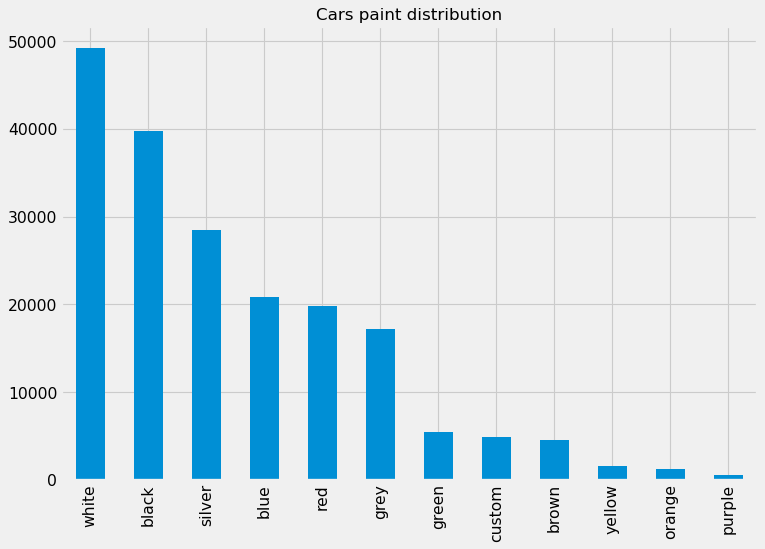

In [65]:
# countplot of the paint varibale of car1

plt.figure(figsize=(10,7),dpi=80) 
car1['paint_color'].value_counts().plot(kind='bar')
plt.title('Cars paint distribution',fontsize = 15)
plt.show()

##### Inferences:
* White and black are the two most popular colors of cars being listed, followed by silver.

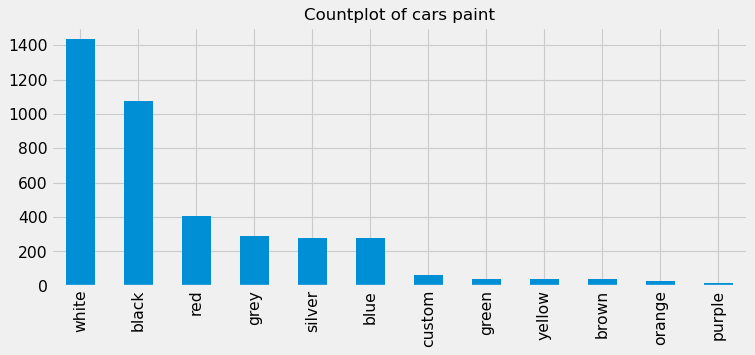

In [66]:
# countplot of the paint varibale of car2

plt.figure(figsize=(10,4),dpi=80) 
car2['paint_color'].value_counts().plot(kind='bar')
plt.title('Countplot of cars paint',fontsize = 15)
plt.show()

##### Inferences:
* In premium cars, white and black colour cars are most frequently listed.

#### 13. State

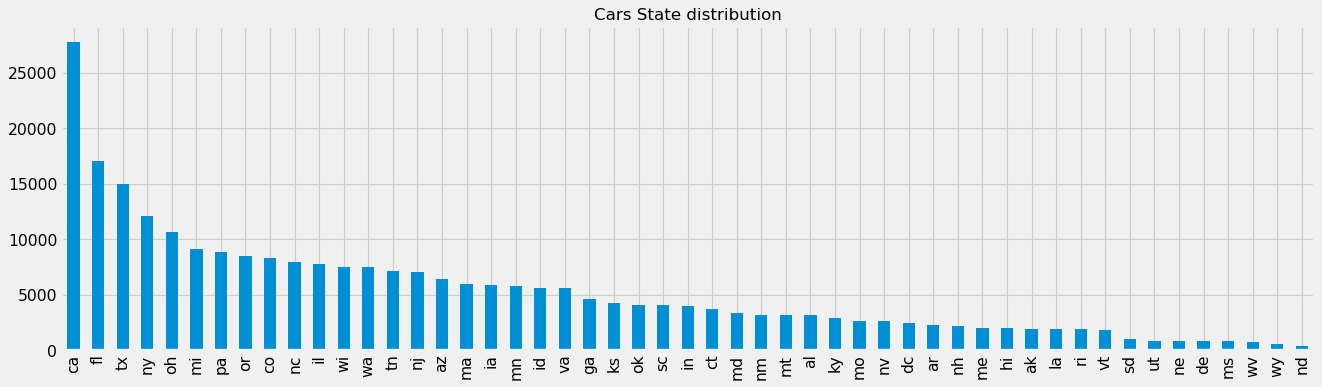

In [67]:
# countplot of the state varibale where cars are available in used car market.

plt.figure(figsize=(18,5),dpi = 80) 
car1['state'].value_counts().plot(kind='bar')
plt.title('Cars State distribution',fontsize = 15)
plt.show()

##### Inferences:
* In used car market most of the cars are from california.
* top 5 states are California, Florida, Texas, New York, Ohio in used car market. 

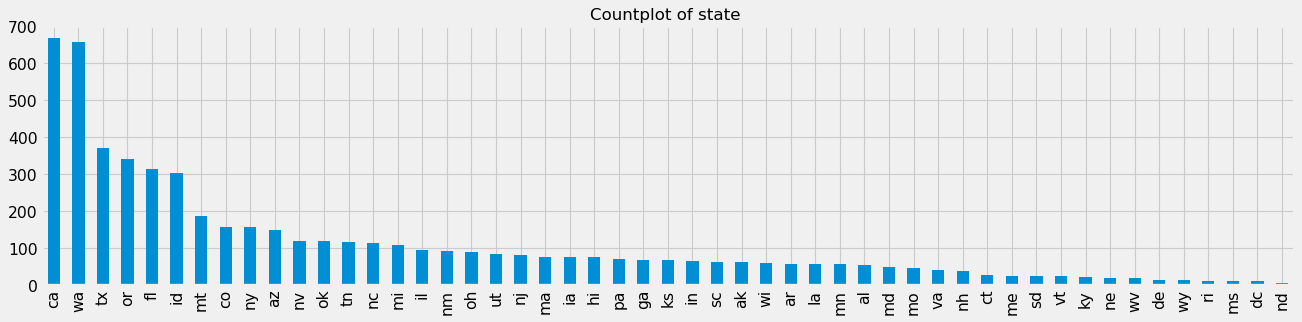

In [68]:
# countplot of the state varibale where cars are available in used car market.

plt.figure(figsize=(18,4),dpi=80) 
car2['state'].value_counts().plot(kind='bar')
plt.title('Countplot of state ',fontsize = 15)
plt.show()

##### Inferences:
* In premium used car market most of the cars are from Callifornia closely followed by Washington.
* Top 5 states are California,Washington,Texas,Oregon and florida in used car market.

### Bivariate Analysis (target vs numerical)

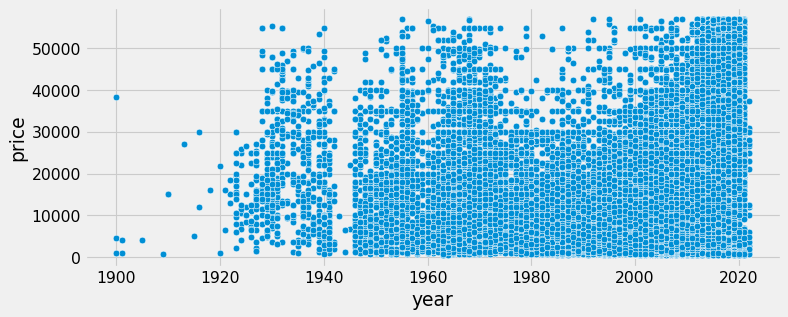

In [69]:
# year Vs price(target) for car1.

plt.figure(figsize=(10,4),dpi=80)
sns.scatterplot(car1.year, car1.price)
plt.show()

## Inferences :-
* Ourdataset contains minimal cars data before 1920.
* There is an increasing trend in car prices after 1980.

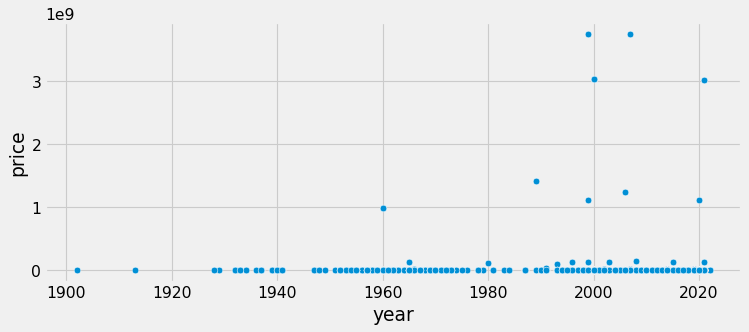

In [70]:
# year Vs price(target) for car2.

plt.figure(figsize=(10,4),dpi=80)
sns.scatterplot(car2.year, car2.price)
plt.show()

##### Inferences:
* Cars with least distance travelled have higher prices.

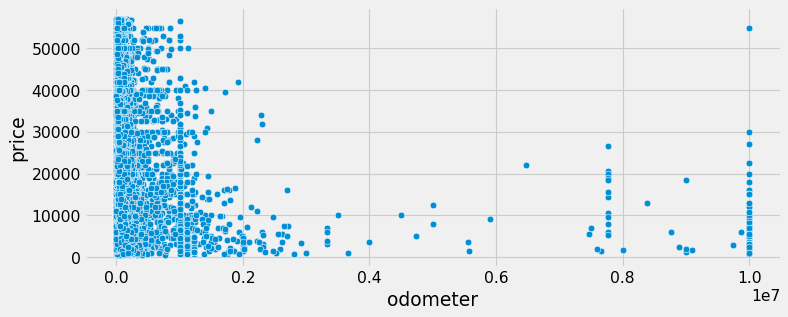

In [71]:
# Odometer vs Price for car1

plt.figure(figsize=(10,4),dpi=80)
sns.scatterplot(car1.odometer, car1.price)
plt.show()

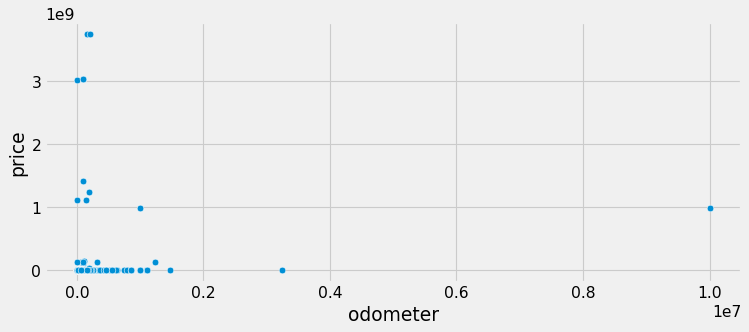

In [72]:
# Odometer vs Price for car2

plt.figure(figsize=(10,4),dpi=80)
sns.scatterplot(car2.odometer, car2.price)
plt.show()

##### Inferences:-
* 99 percent of the cars have travelled low distance.

### Bivariate Analysis (target vs categorical)

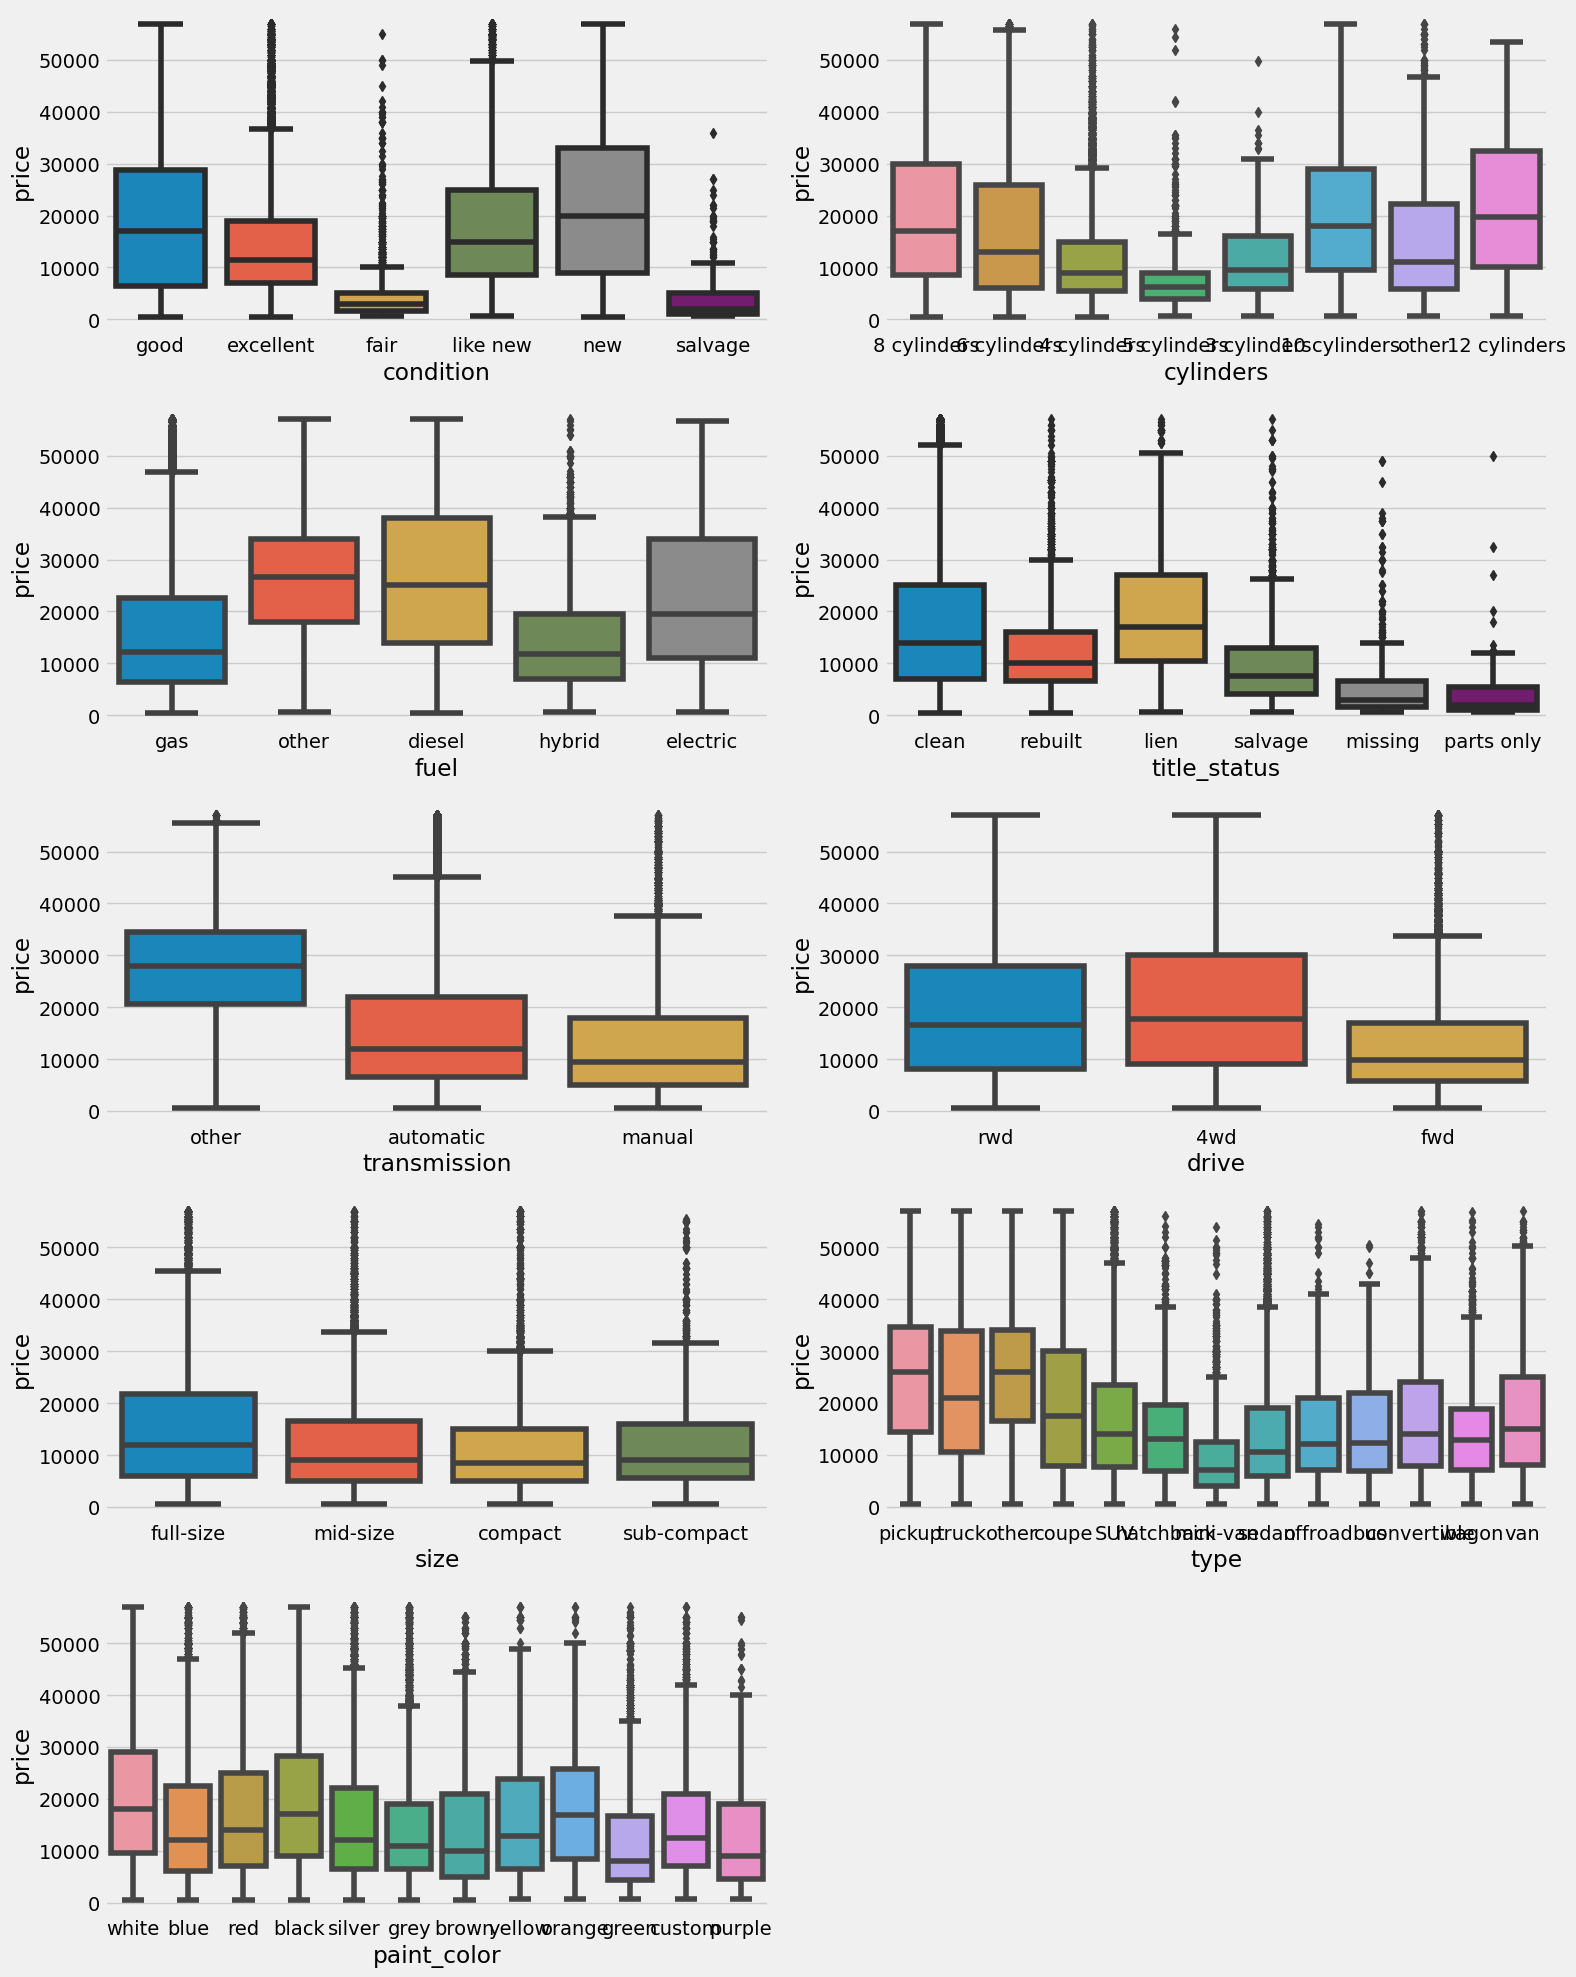

In [73]:
# car1
cat_cols = ['condition','cylinders','fuel','title_status', 'transmission','drive','size','type', 'paint_color']

plt.figure(figsize=(16,20))
t = 1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.boxplot(car1[i], car1.price)
    t+=1
plt.tight_layout()
plt.show()

### Inferences:
**1. 'condition' vs 'price'**
* Newly purchased cars have higher Average price.
* Salvaged cars have the least Average price.
* There are outliers present in Excellent, fair, like new and salvage condition categories.

**2. 'cylinder' vs 'price'**
* Cars having 12 cylinders have maximum average price followed by 10 and 8 cylinders.
* There are outliers present in each of the cylinder categories except 8, 10 and 12.

**3. 'fuel' vs 'price'**
* As we can see Average cost of 'other' category fuels is the highest and as all the major fuel types are already displayed, we can   interpret that 'other' category fuels may contain exotic/costly fuels.
* 'Diesel' has 2nd highest Average price in fuel type.
* The fuel types with Least Average price are gas and hybrid.
* There are outliers present in gas and hybrid fuel categories.

**4. 'title_status' vs 'price**
* Cars with title_status 'lien' has the highest average price.
* There are outliers present in each of the title_status categories.

**5. 'transmission' vs 'price'**
* 'Automatic' has higher average price than 'manual' cars
* In transmission category 'other' has the highest average price.
* There are outliers present in each of the transmission categories.

**6. 'drive' vs 'price'**
* 4wd (4 wheel drive) has the highest average price.
* From buisness understanding we can say that 4wd are commonly found in SUV's and pickup trucks which are usually on the      higher price side.
* There are outliers present in fwd  drive category.

**7. 'size' vs 'price'**
* 'full-size' cars have the highest average price.
* There are outliers present in each of the size categories.

**8. 'type' vs 'price'**
* Cars type 'pickup' has the highest average price.
* Mini-van has the least average price..
* There are outliers present in each of the type categories except pickup, truck, coupe.

**9. 'paint_color' vs 'price'**
* Cars with 'paint_color' white and black have the highest average price.
* There are outliers present in each of the paint_color categories except white and black.
* Cars with paint-color green has the least average price.

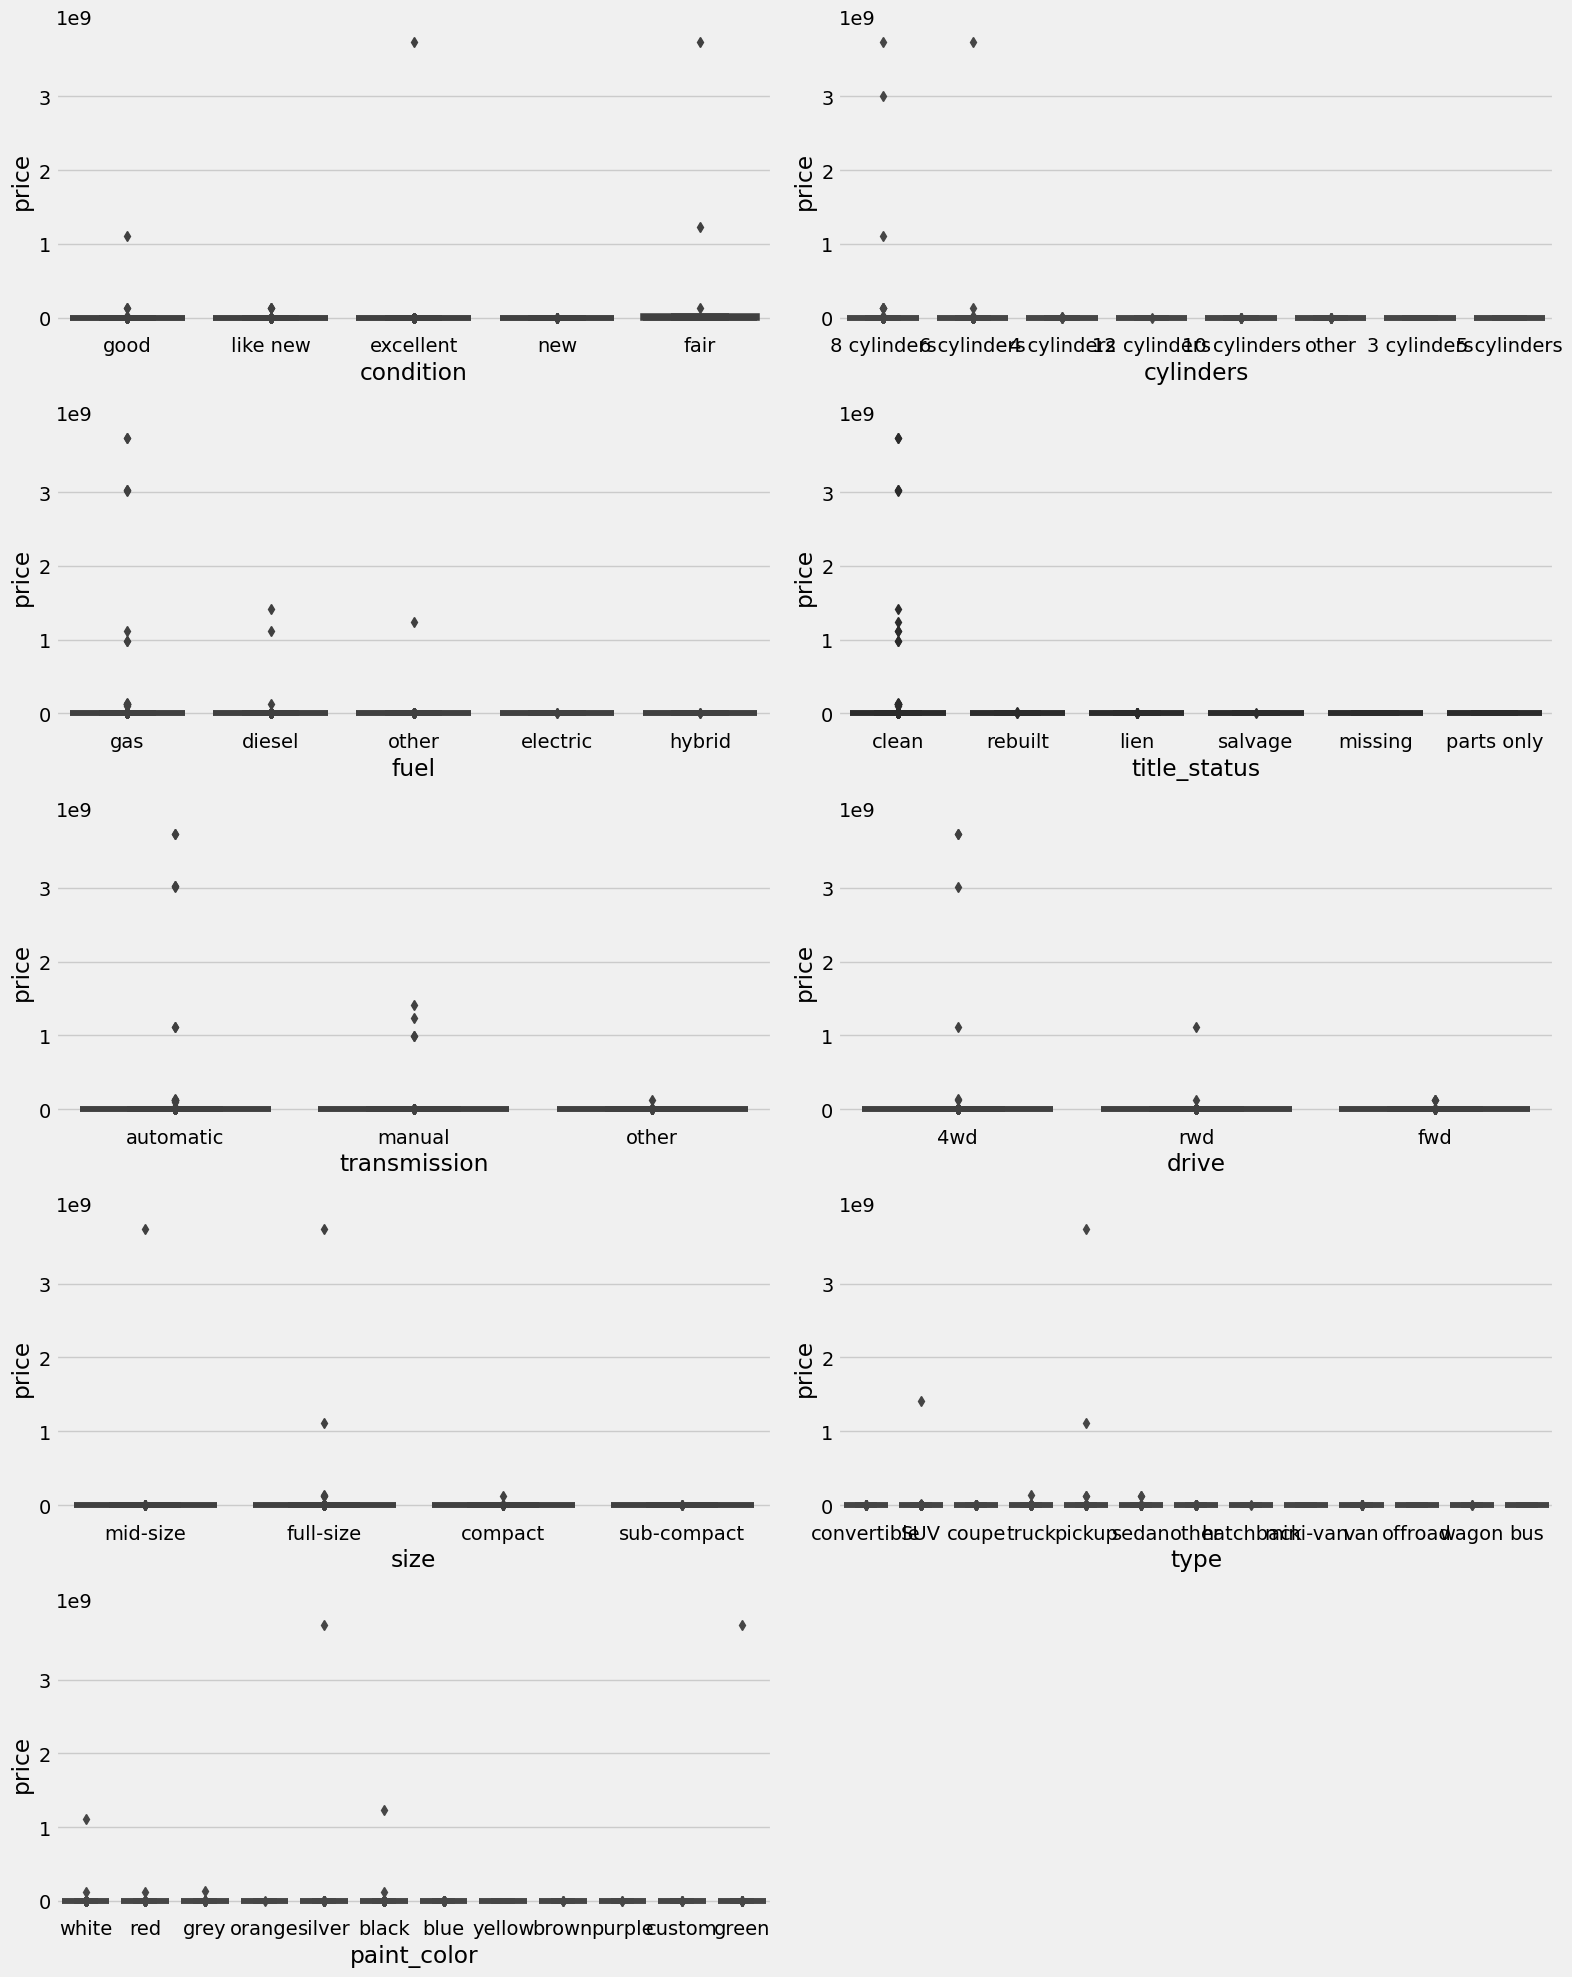

In [74]:
# car2

cat_cols = ['condition','cylinders','fuel','title_status', 'transmission','drive','size','type', 'paint_color']

plt.figure(figsize=(16,20))
t = 1
for i in cat_cols:
    plt.subplot(5,2,t)
    sns.boxplot(car2[i], car2.price)
    t+=1
plt.tight_layout()
plt.show()

##### Inferences:-
* As the cars2 dataset has very low amount of data, we can not make viable inferences from the graphs.

# 

## Missing Values dealing

In [75]:
car.isnull().sum()[car.isnull().sum()!=0]

year               796
manufacturer     12331
model             3820
condition       100709
cylinders       105333
fuel              1567
odometer          1307
title_status      4346
transmission      1179
VIN             125038
drive            81782
size            189881
type             64617
paint_color      79731
description          2
dtype: int64

#### 1.Year

In [76]:
car[car.year.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
194,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,33990,NaN,NaN,lac XT5 Crossover,NaN,6 cylinders,gas,48784.0,clean,automatic,1GYKNERSXJZ160440,fwd,NaN,SUV,black,2018 *Cadillac* *XT5 Crossover* FWD 4dr Premiu...,al,2021-05-04 15:11:04+00:00
350,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,35495,NaN,NaN,Series,NaN,4 cylinders,gas,14000.0,clean,automatic,3MW5R1J08L8B21625,rwd,NaN,sedan,white,"2020 *BMW* *3 Series* 330i Sedan - $35,495Call...",al,2021-05-01 09:40:22+00:00
578,https://bham.craigslist.org/ctd/d/new-castle-2...,birmingham,32995,NaN,NaN,r XF,NaN,4 cylinders,gas,22105.0,clean,automatic,SAJBD4FX6JCY57725,rwd,NaN,sedan,white,2018 *Jaguar* *XF* 25t Premium RWD Sedan - $32...,al,2021-04-27 15:10:59+00:00


In [77]:
# Writing the function to fetch the years from url.

def url_year(x):
    a = x.split('-')   #------------------ it is splitting the url by '-'
    for i in a:     #----------------- for loop for in a to check for year like 19xx and 20xx.
        if len(i)==4:    #---------------- fetching only those words which contain 4 words only.
            if i[0]=='2' or i[0]=='1':   #-------------- taking those words which starts with 1 &2.
                if i.isdigit():   #------------------checking that word is number or not.
                    if float(i)>1900 and float(i)<2021:   #---------------- taking only b/w 1900 and 2021.
                        return float(i)   # -----------------returning the year.
                    

In [78]:
# filling the null values of year from url_year (we made above).

car['year']=np.where(car.year.isnull(),car.url.apply(url_year),car.year) 

In [79]:
car.year.isnull().sum()

55

Now we deal with these 55 values using python Vin function.

In [80]:
from vininfo import Vin # Vin is used for cars info.

In [81]:
# Function to fetch the year from vin number.
def vin_year(x):
    if type(x)!=float:
        if len(x)==17:         #---------------Checking for length of VIN. Because all the cars have length of vin number is 17.
            for i in ['I','O','Q']:   #----------running loop to see if there is I,O,Q. Because in VIN no. there is No i,O,Q.
                y = x.find(i, 0, 16)    #---------finding the I,O,Q in VIN. returns index when present gives -1.
                if y != -1:     #--------------if y is not y means I,O,Q is/are present in VIN.
                    return np.nan   
            v =Vin(x).years   # ----------------python function returns year of VIN. It returns list.
            if len(v)>0:   #-----------------taking only those list which have atleast one value.
                return v[0]  #-----------------returning year.
        else:
            return np.nan  #------------returning nan for VIN which don't have 17 length.
    else:
        return np.nan  #------- it returns nan for already nan values in VIN

In [82]:
# Filling the remaining nan values by finding year from the VIN Number.

car['year']=np.where(car.year.isnull(),car['VIN'].apply(vin_year),car.year)

In [83]:
car.year.isnull().sum()

9

So we have only 9 nan values. Its a very small proportion of the data so we can impute these with the median value.

In [84]:
# We fill remaining nan values with median.

car['year']=np.where(car.year.isnull(),car.year.mode(),car.year)

In [85]:
# Some cars have model year is 2022 but posting date is 2021. So these are misleading values and we treat them as 2021.
car['year'] = np.where(car.year==2022,2021,car.year)

In [86]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


In [87]:
car.year.isnull().sum()

0

# 

#### 2. Manufacturer

In [88]:
car[car.manufacturer.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
97,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,15990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,29652.0,clean,other,JTNKARJEXGJ517925,fwd,NaN,hatchback,blue,Carvana is the safer way to buy a car During t...,al,2021-04-19 15:51:13+00:00
122,https://auburn.craigslist.org/cto/d/west-point...,auburn,6800,2005.0,NaN,blue bird bus,excellent,6 cylinders,diesel,180000.0,clean,automatic,NaN,rwd,full-size,bus,yellow,"2005 Blue Bird 12 window, 72 passenger bus tha...",al,2021-04-13 16:20:25+00:00
135,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,14990,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,gas,65203.0,clean,other,JTNKARJE4GJ508198,fwd,NaN,hatchback,red,Carvana is the safer way to buy a car During t...,al,2021-04-11 15:11:14+00:00


In [89]:
# Null values in the Manufacturer variable.

car.manufacturer.isnull().sum()

12331

We have 12331 null values in manufacturer.

In [90]:
# Function to fetch the manufacturer from vin number.
def vin_manu(x):
    if type(x)!=float:
        if len(x)==17:
            for i in ['I','O','Q']:    #----------running loop to see if there is I,O,Q. Because in VIN no. there is No i,O,Q.
                y = x.find(i, 0, 16)  #---------finding the I,O,Q in VIN. returns index when present gives -1.
                if y != -1:     #--------------if y is not y means I,O,Q is/are present in VIN.
                    return np.nan
            v =Vin(x)      # ----------------python function returns year of VIN. It returns list.
            return v.manufacturer  #------------- returns manufacturer name.
        else:
            return np.nan  #------------returning nan for VIN which don't have 17 length.
    else:
        return np.nan

In [91]:
# Filling the null values by fetching the manufacturer from VIN number.

car['manufacturer']=np.where(car.manufacturer.isnull(),car.VIN.apply(vin_manu),car.manufacturer)

In [92]:
car.manufacturer.isnull().sum()

7771

In [93]:
# DataFrame of not null values of manufacturer and model.

df = car.loc[(car.manufacturer.notnull())& (car.model.notnull()),['model','manufacturer']]

In [94]:
# Dictionary having keys as model and values are manufacturer.

manu_dict = dict(zip(df.model,df.manufacturer))

In [95]:
# Now map the dictionary to find the manufacturer for that model.

car['manufacturer']=np.where(car.manufacturer.isnull(),car.model.map(manu_dict),car.manufacturer)

In [96]:
car.manufacturer.isnull().sum()

5819

In [97]:
# array of Unique values for manufacturer.

manu_uni = car.manufacturer.unique()

In [98]:
# Defining the function to find the manufacturer from url.

def url_manu(x):
    a = x.split('-')   #------------------ it is splitting the url by '-'
    for i in range(0,len(a)):     #----------------- for loop for in a to check for year like 19xx and 20xx.
        if len(a[i])==4:    #---------------- fetching only those words which contain 4 words only.
            if a[i][0]=='2' or a[i][0]=='1':   #-------------- taking those words which starts with 1 &2.
                if a[i].isdigit():   #------------------checking that word is number or not.
                    if float(a[i])>1900 and float(a[i])<2021:   #---------------- taking only b/w 1900 and 2021.
                        if a[i+1] in manu_uni:  # ------------checking the just next value of year is in manu_list.
                            return (a[i+1])   # -----------------returning the year.
                        else:
                            return np.nan

In [99]:
# Filling the null values of manufacturer using above function from url.

car['manufacturer']=np.where(car.manufacturer.isnull(),car.url.apply(url_manu),car.manufacturer)

In [100]:
car.manufacturer.isnull().sum()

4995

Still we have 4995 entreis null in manufacturer and we don't have any further information to fill so we fill the manufacturer with unknown.

In [101]:
# Filling the remaining null values with unknown  as we don't have further information.

car['manufacturer']=np.where(car.manufacturer.isnull(),'unknown',car.manufacturer)

In [102]:
car.manufacturer.isnull().sum()

0

In [103]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 3. Model

In [104]:
car[car.model.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
96,https://auburn.craigslist.org/cto/d/valley-one...,auburn,80,2004.0,honda,NaN,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,Asking $800 Loaded 2004 Honda Accord EX-L! 94k...,al,2021-04-19 17:55:06+00:00
101,https://auburn.craigslist.org/cto/d/wanted-vol...,auburn,12990,1968.0,volvo,NaN,NaN,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,Looking to find a good Volvo 1800S or 1800ES w...,al,2021-04-19 12:46:40+00:00
280,https://bham.craigslist.org/cto/d/trussville-1...,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,al,2021-05-02 18:24:09+00:00


In [105]:
car.model.isnull().sum()

3820

In [106]:
# As we have many model for every manufacturer so we don't have specific information for that model. so we impute the values
# as 'unknown'.

car['model']=np.where(car.model.isnull(),'unknown',car.model)

In [107]:
car.model.isnull().sum()

0

In [108]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 4. Condition

In [109]:
car[car.condition.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
101,https://auburn.craigslist.org/cto/d/wanted-vol...,auburn,12990,1968.0,volvo,unknown,NaN,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,Looking to find a good Volvo 1800S or 1800ES w...,al,2021-04-19 12:46:40+00:00
171,https://bham.craigslist.org/cto/d/helena-2001-...,birmingham,5900,2001.0,unknown,F-350,NaN,8 cylinders,diesel,200000.0,clean,automatic,NaN,rwd,NaN,NaN,NaN,"The infamous , invincible million Mille 7.3 po...",al,2021-05-04 19:04:39+00:00
187,https://bham.craigslist.org/ctd/d/dolomite-200...,birmingham,4500,2008.0,ford,mustang,NaN,6 cylinders,gas,187016.0,clean,automatic,1ZVHT80N885207297,rwd,NaN,coupe,red,"2008 *Ford* *Mustang* 2dr Coupe Deluxe - $4,50...",al,2021-05-04 18:20:30+00:00


In [110]:
car.condition.isnull().sum()

100709

In [111]:
#Condition gives us some misleading results as title_status is salvage than a car has excellent ,good,etc. conditions.
# So we fill these values with salvage.
# Because title_status has 97% clean.and govt. approved.
# And we see if there is condition is slavage then title_status is only 1 type salvage.

In [112]:
# Filling the misleading and null values with salvage where title_status is salvage.

car['condition']=np.where(car.title_status=='salvage','salvage',car.condition)

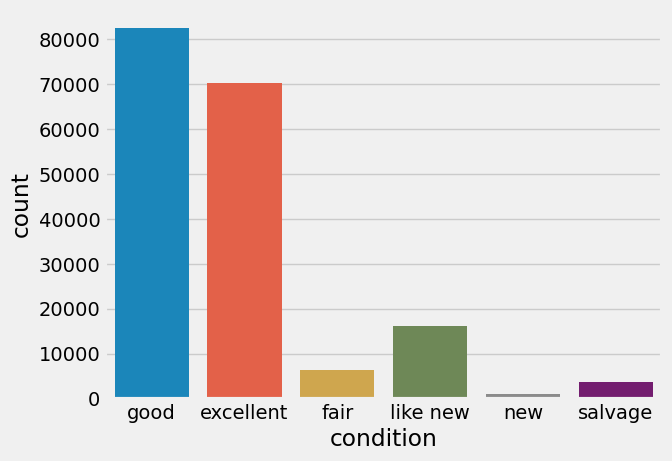

In [113]:
# countplot for types of conditions

sns.countplot(car.condition)
plt.show()

In [114]:
# Sort the dataframe on year and filling them as forward fill as we don't have any other specific information about the 
# Condition of the car.

car['condition']=car.sort_values(by='year')['condition'].ffill(axis=0)

In [115]:
car.condition.isnull().sum()

0

In [116]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


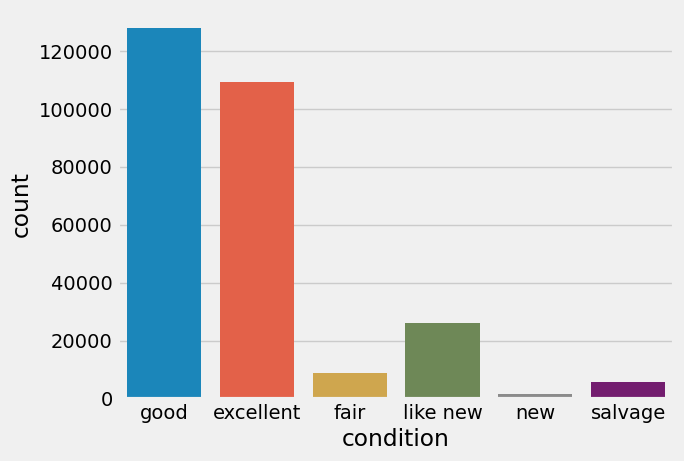

In [117]:
# countplot for types of conditions

sns.countplot(car.condition)
plt.show()

After imputing the null values of condition by forward fill we still have the same distribution of condition.

# 

#### 5. Fuel

In [118]:
car[car.fuel.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
225,https://bham.craigslist.org/ctd/d/gadsden-2011...,birmingham,20995,2011.0,chevrolet,silverado 1500 ltz crew cab 4wd,good,NaN,NaN,137701.0,NaN,automatic,3GCPKTE30BG264332,4wd,NaN,pickup,NaN,2011 Chevrolet Silverado 1500 LTZ Crew Cab 4WD...,al,2021-05-03 20:06:42+00:00
226,https://bham.craigslist.org/ctd/d/gadsden-2015...,birmingham,25995,2015.0,chevrolet,silverado 1500 lt crew cab 4wd,good,NaN,NaN,151681.0,NaN,automatic,3GCUKREC2FG257362,4wd,NaN,pickup,NaN,2015 Chevrolet Silverado 1500 LT Crew Cab 4WD ...,al,2021-05-03 20:05:09+00:00
227,https://bham.craigslist.org/ctd/d/gadsden-2014...,birmingham,31995,2014.0,chevrolet,silverado 1500 2lt crew cab long box 4wd,excellent,NaN,NaN,66738.0,NaN,automatic,3GCUKREC8EG123888,4wd,NaN,pickup,NaN,2014 Chevrolet Silverado 1500 2LT Crew Cab Lon...,al,2021-05-03 20:03:33+00:00


In [119]:
car.fuel.isnull().sum()

1567

In [120]:
import scipy.stats as stats

# Defining the mode function to take the mode values.

def mode_1(x):
    return stats.mode(x)[0]

In [121]:
# taking the mode value for every value. and filling the missing values according to the model.

df =car[car.fuel.notnull()].pivot_table(index=['model'],aggfunc={'fuel':mode_1}).reset_index()
df['fuel'] = df['fuel'].apply(lambda x: x[0])


# making the dictionary of model and fuel.
fuel_dict=dict(zip(df.model,df.fuel))


# filling the mode value according to the model in the fuel.
car['fuel']=np.where(car.fuel.isnull(),car.model.map(fuel_dict),car.fuel)

In [122]:
car.fuel.isnull().sum()

984

In [123]:
# taking the mode value for every value. and filling the missing values according to the manufacturer.

df =car[car.fuel.notnull()].pivot_table(index=['manufacturer'],aggfunc={'fuel':mode_1}).reset_index()
df['fuel'] = df['fuel'].apply(lambda x: x[0])


# making the dictionary of manufacturer and fuel.
fuel_dict=dict(zip(df.manufacturer,df.fuel))


# filling the mode value according to the model in the fuel.
car['fuel']=np.where(car.fuel.isnull(),car.manufacturer.map(fuel_dict),car.fuel)

In [124]:
car.fuel.isnull().sum()

1

In [125]:
car[car.fuel.isnull()]

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
5506,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,19995,1999.0,Western Star,Western Star Conventional,excellent,6 cylinders,NaN,123456.0,clean,manual,2WKEDDCJ5XK959166,rwd,NaN,other,custom,This Western Star Conventional can be yours t...,ak,2021-04-30 04:01:30+00:00


In [126]:
# Western star is a heavy truck and its fuel type is obivously diesel so we fill it with diesel.
car.fuel = np.where(car.fuel.isnull(),'diesel',car.fuel)

In [127]:
car.fuel.isnull().sum()

0

# 

#### 6. Odometer

In [128]:
car[car.odometer.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
541,https://bham.craigslist.org/ctd/d/gainesville-...,birmingham,18950,2009.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,NaN,2009 Jeep Wrangler Unlimited Sahara NO DEAL...,al,2021-04-27 22:45:11+00:00
772,https://bham.craigslist.org/ctd/d/gainesville-...,birmingham,14950,2007.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,silver,2007 Jeep Wrangler Unlimited NO DEALER FEES...,al,2021-04-23 17:45:58+00:00
1030,https://bham.craigslist.org/ctd/d/gainesville-...,birmingham,19950,2008.0,jeep,wrangler,excellent,NaN,gas,NaN,clean,automatic,NaN,4wd,NaN,NaN,black,2008 Jeep Wrangler Unlimited X NO DEALER FE...,al,2021-04-19 18:30:15+00:00


In [129]:
car.odometer.describe()

count    2.780770e+05
mean     1.045384e+05
std      2.246309e+05
min      0.000000e+00
25%      4.160100e+04
50%      9.237500e+04
75%      1.400650e+05
max      1.000000e+07
Name: odometer, dtype: float64

* We have some 0 values in the odometer so we deal with 0 and null values.
* As we know the max range of odometer of car is 9,99,999. So we fill them as maximum.

In [130]:
# Filling the misleading values with maximum reading of the possible odometer value.

car.odometer=np.where(car.odometer>999999,999999,car.odometer)

In [131]:
car.odometer.describe()

count    278077.000000
mean      99922.790349
std       82973.997913
min           0.000000
25%       41601.000000
50%       92375.000000
75%      140065.000000
max      999999.000000
Name: odometer, dtype: float64

In [132]:
# Creating the dictionary of not null values in the odometer with the model.
odo_dict = car.loc[car.odometer.notnull()].groupby('model')['odometer'].mean().to_dict()


# Filling the null values with the above dictionary.
car.odometer=np.where(car.odometer.isnull(),car.model.map(odo_dict),car.odometer)


# Filling the 0 values with the above dictionary.
car.odometer=np.where(car.odometer==0,car.model.map(odo_dict),car.odometer)

In [133]:
car.odometer.describe()

count    279240.000000
mean     100097.978987
std       82746.912405
min           0.000000
25%       42000.000000
50%       92767.000000
75%      140000.000000
max      999999.000000
Name: odometer, dtype: float64

In [134]:
# Finding the median of the odometer values.
x = round(car.odometer.median(),2)


# Filling the null values with median.
car.odometer=np.where(car.odometer.isnull(),x,car.odometer)


# Filling the 0 values with the median values.
car.odometer=np.where(car.odometer==0,x,car.odometer)

In [135]:
car.odometer.describe()

count    279384.000000
mean     100161.936862
std       82681.733940
min           1.000000
25%       42045.000000
50%       92767.000000
75%      140000.000000
max      999999.000000
Name: odometer, dtype: float64

In [136]:
car[car.odometer<50].shape

(2528, 20)

There are some values less than 50 are present in odometer.

In [137]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 7.Transmission

In [138]:
car[car.transmission.isnull()].head()

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
2961,https://huntsville.craigslist.org/ctd/d/columb...,huntsville / decatur,14499,2016.0,nissan,murano,good,NaN,gas,124543.0,clean,NaN,5N1AZ2MHXGN164337,4wd,NaN,wagon,black,2016 Nissan Murano SV Offered by: AUTOVERS...,al,2021-04-26 16:44:03+00:00
5088,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,39995,2012.0,ford,f-550,excellent,NaN,gas,50740.0,clean,NaN,1FDUF5HY1CEB83922,4wd,NaN,other,red,2012 Ford F-550 Super Duty 4X4 2dr Regular Cab...,ak,2021-05-03 22:05:37+00:00
5250,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,8900,2006.0,lexus,gs,like new,6 cylinders,gas,147583.0,clean,NaN,JTHCH96SX60019262,NaN,NaN,sedan,silver,Bad Credit - No Credit... We Can Help! 907.280...,ak,2021-05-02 02:06:32+00:00
5284,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,24995,2006.0,ford,f-550,fair,NaN,diesel,112939.0,clean,NaN,1FDAX57P36ED52397,4wd,NaN,other,white,2006 Ford F-550 Super Duty 4X4 4dr SuperCab 16...,ak,2021-05-01 22:50:32+00:00
5384,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,28245,2005.0,chevrolet,corvette,good,8 cylinders,gas,26823.0,clean,NaN,1G1YY22UX55129650,NaN,NaN,other,silver,This Chevrolet Corvette can be yours today!If ...,ak,2021-05-01 03:03:27+00:00


In [139]:
car.transmission.isnull().sum()

1179

In [140]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car.transmission.notnull()].pivot_table(index=['model'],aggfunc={'transmission':mode_1}).reset_index()
df['transmission'] = df['transmission'].apply(lambda x: x[0])


# making the dictionary of model and transmission.
trans_dict=dict(zip(df.model,df.transmission))


# filling the mode value according to the model in the transmission.
car['transmission']=np.where(car.transmission.isnull(),car.model.map(trans_dict),car.transmission)

In [141]:
car.transmission.isnull().sum()

73

In [142]:
# Now taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.transmission.notnull()].pivot_table(index=['manufacturer'],aggfunc={'transmission':mode_1}).reset_index()
df['transmission'] = df['transmission'].apply(lambda x: x[0])


# making the dictionary of manufacturer and transmission.
trans_dict=dict(zip(df.manufacturer,df.transmission))

# filling the mode value according to the manufacturer in the transmission.
car['transmission']=np.where(car.transmission.isnull(),car.manufacturer.map(trans_dict),car.transmission)

In [143]:
car.transmission.isnull().sum()

0

In [144]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 8. Type

In [145]:
car[car.type.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
37,https://auburn.craigslist.org/cto/d/opelika-19...,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,192k miles brand new TSLs 4x4 jeep xj. 4x4 wor...,al,2021-05-03 12:38:05+00:00
96,https://auburn.craigslist.org/cto/d/valley-one...,auburn,80,2004.0,honda,unknown,excellent,6 cylinders,gas,94020.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,Asking $800 Loaded 2004 Honda Accord EX-L! 94k...,al,2021-04-19 17:55:06+00:00
101,https://auburn.craigslist.org/cto/d/wanted-vol...,auburn,12990,1968.0,volvo,unknown,excellent,NaN,gas,99999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,Looking to find a good Volvo 1800S or 1800ES w...,al,2021-04-19 12:46:40+00:00


In [146]:
car.type.isnull().sum()

64617

In [147]:
# taking the mode value for every Model. and filling the missing values according to the model.
df =car[car.type.notnull()].pivot_table(index=['model'],aggfunc={'type':mode_1}).reset_index()
df['type'] = df['type'].apply(lambda x: x[0])


# making the dictionary of model and type.
type_dict=dict(zip(df.model,df.type))


# filling the mode value according to the model in the type.
car['type']=np.where(car.type.isnull(),car.model.map(type_dict),car.type)

In [148]:
car.type.isnull().sum()

6769

In [149]:
# taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.type.notnull()].pivot_table(index=['manufacturer'],aggfunc={'type':mode_1}).reset_index()
df['type'] = df['type'].apply(lambda x: x[0])

# making the dictionary of manufacturer and type.
trans_dict=dict(zip(df.manufacturer,df.type))

# filling the mode value according to the manufacturer in the type.
car['type']=np.where(car.type.isnull(),car.manufacturer.map(trans_dict),car.type)

In [150]:
car.type.isnull().sum()

4

In [151]:
# filling the mode value according to the mode of type.
car['type']=np.where(car.type.isnull(),car.type.mode(),car.type)

In [152]:
car.type.isnull().sum()

0

In [153]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 9. Drive

In [154]:
car[car.drive.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


In [155]:
car.drive.isnull().sum()

81782

In [156]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car.drive.notnull()].pivot_table(index=['model'],aggfunc={'drive':mode_1}).reset_index()
df['drive'] = df['drive'].apply(lambda x: x[0])


# making the dictionary of model and drive.
drive_dict=dict(zip(df.model,df.drive))


# filling the mode value according to the model in the drive.
car['drive']=np.where(car.drive.isnull(),car.model.map(drive_dict),car.drive)

In [157]:
car.drive.isnull().sum()

14104

In [158]:
# taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.drive.notnull()].pivot_table(index=['manufacturer'],aggfunc={'drive':mode_1}).reset_index()
df['drive'] = df['drive'].apply(lambda x: x[0])


# making the dictionary of manufacturer and drive.
trans_dict=dict(zip(df.manufacturer,df.drive))

# filling the mode value according to the manufacturer in the drive.
car['drive']=np.where(car.drive.isnull(),car.manufacturer.map(trans_dict),car.drive)

In [159]:
car.drive.isnull().sum()

32

In [160]:
# taking the mode value for every type. and filling the missing values according to the type.
df =car[car.drive.notnull()].pivot_table(index=['type'],aggfunc={'drive':mode_1}).reset_index()
df['drive'] = df['drive'].apply(lambda x: x[0])


# making the dictionary of drive and type.
trans_dict=dict(zip(df.type,df.drive))


# filling the mode value according to the type in the drive.
car['drive']=np.where(car.drive.isnull(),car.type.map(trans_dict),car.drive)

In [161]:
car.drive.isnull().sum()

0

In [162]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,4wd,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,4wd,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,4wd,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 10. Size

In [163]:
car[car['size'].isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,4wd,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,4wd,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,4wd,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


In [164]:
car['size'].isnull().sum()

189881

In [165]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car['size'].notnull()].pivot_table(index=['model'],aggfunc={'size':mode_1}).reset_index()
df['size'] = df['size'].apply(lambda x: x[0])


# making the dictionary of model and size.
size_dict=dict(zip(df.model,df['size']))


# filling the mode value according to the model in the size.
car['size']=np.where(car['size'].isnull(),car.model.map(size_dict),car['size'])

In [166]:
car['size'].isnull().sum()

51115

In [167]:
# taking the mode value for every type. and filling the missing values according to the type.
df =car[car['size'].notnull()].pivot_table(index=['type'],aggfunc={'size':mode_1}).reset_index()
df['size'] = df['size'].apply(lambda x: x[0])


# making the dictionary of type and size.
size_dict=dict(zip(df.type,df['size']))

# filling the mode value according to the type in the size.
car['size']=np.where(car['size'].isnull(),car.type.map(size_dict),car['size'])

In [168]:
car['size'].isnull().sum()

0

In [169]:
car.head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
27,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,4wd,full-size,pickup,white,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:18+00:00
28,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,4wd,full-size,pickup,blue,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:08+00:00
29,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,4wd,full-size,pickup,red,Carvana is the safer way to buy a car During t...,al,2021-05-04 17:31:25+00:00


# 

#### 11. Paint color

In [170]:
car[car.paint_color.isnull()].head(3)

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
37,https://auburn.craigslist.org/cto/d/opelika-19...,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,NaN,4wd,mid-size,SUV,NaN,192k miles brand new TSLs 4x4 jeep xj. 4x4 wor...,al,2021-05-03 12:38:05+00:00
50,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,38990,2020.0,ford,f150 supercrew cab xlt,good,6 cylinders,gas,12231.0,clean,other,1FTEW1CP4LFB84170,4wd,full-size,pickup,NaN,Carvana is the safer way to buy a car During t...,al,2021-04-30 15:11:00+00:00
52,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,31590,2020.0,mazda,mx-5 miata club,good,NaN,gas,2195.0,clean,other,JM1NDAC74L0413665,rwd,full-size,other,NaN,Carvana is the safer way to buy a car During t...,al,2021-04-29 23:11:10+00:00


In [171]:
car.paint_color.isnull().sum()

79731

In [172]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car.paint_color.notnull()].pivot_table(index=['model'],aggfunc={'paint_color':mode_1}).reset_index()
df['paint_color'] = df['paint_color'].apply(lambda x: x[0])


# making the dictionary of model and paint color.
paint_dict=dict(zip(df.model,df.paint_color))


# filling the mode value according to the model in the paint color.
car['paint_color']=np.where(car.paint_color.isnull(),car.model.map(paint_dict),car.paint_color)

In [173]:
car.paint_color.isnull().sum()

9717

In [174]:
# taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.paint_color.notnull()].pivot_table(index=['manufacturer'],aggfunc={'paint_color':mode_1}).reset_index()
df['paint_color'] = df['paint_color'].apply(lambda x: x[0])


# making the dictionary of manufacturer and paint color.
paint_dict=dict(zip(df.manufacturer,df.paint_color))

# filling the mode value according to the manufacturer in the paint color.
car['paint_color']=np.where(car.paint_color.isnull(),car.manufacturer.map(paint_dict),car.paint_color)

In [175]:
car.paint_color.isnull().sum()

3

In [176]:
car[car.paint_color.isnull()]

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,posting_date
56373,https://sandiego.craigslist.org/csd/cto/d/el-c...,san diego,5999,2005.0,NUMMI,Corolla,excellent,NaN,gas,89000.0,clean,automatic,1NXBR32EX5Z519187,fwd,mid-size,sedan,NaN,2005 Toyota Corolla Clean title 89 k mile Auto...,ca,2021-05-01 12:52:44+00:00
64634,https://stockton.craigslist.org/ctd/d/tracy-20...,stockton,5495,2005.0,NUMMI,Toytoa Corolla LE,good,NaN,gas,103400.0,clean,automatic,1NXBR32E95Z548471,fwd,mid-size,sedan,NaN,GREAT CONDITION VERY CLEAN CLEAN BODY CLEAN IN...,ca,2021-04-27 20:47:59+00:00
412072,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,8880,2018.0,Mitsubishi Thailand,bishi Mirage,good,3 cylinders,gas,54527.0,clean,automatic,ML32A3HJ4JH003929,fwd,mid-size,sedan,NaN,"2018 *Mitsubishi* *Mirage* ES CVT Sedan - $8,8...",wa,2021-04-05 15:30:59+00:00


In [177]:
# Filling the remaining the null values with the mode of paint color.

car.paint_color = np.where(car.paint_color.isnull(),car.paint_color.mode(),car.paint_color)

In [178]:
car.paint_color.isnull().sum()

0

# 

#### 12. Cylinders

In [179]:
car[car.fuel=='electric']['cylinders'].unique()

array([nan, '4 cylinders', 'other', '8 cylinders', '6 cylinders'],
      dtype=object)

From domain knowledge we know that electric cars don't have cylinders so the above values are misleading values. So we fill all these values as other.

In [180]:
car.cylinders=np.where(car.fuel=='electric','other',car.cylinders)

In [181]:
car.cylinders.isnull().sum()

104464

In [182]:
# Definig the function for fetching the cylinders from the description.

def cyl_draw(x):
    if type(x)!=float:   #------------ checking the description is null or not
        y = x.split(' ')  #-----------------split the description in words.
        for i in range(0,len(y)):   #------------- loop to check for every word.
            if y[i] in ['cylinder','Cylinder','cylinders','Cylinders','CYL']:  #----------------- checking the word in list.
                if len(y[i-1])>1:   #------------ check len of previous word is greater than 1. ex- V6, V8, V12.
                    if y[i-1][-1] in ['3','4','5','6','8']:  #-------
                        return (str(y[i-1][-1])+' cylinders') #---------return the cylinders.
                    elif y[i-1][-2:] in ['10','12']:
                        return (str(y[i-1][-2:])+' cylinders')
                    elif y[i-1] == 'other':  #-------- checking for other cylinders.
                        return (y[i-1])    # returning other
                    else:
                        return np.nan
                else:
                    if y[i-1] in ['3','4','5','6','8','10','12']:   #-------------checking the previous word in the list.
                        return (str(y[i-1])+' cylinders')   #----------- returning the cylinders.
                    elif y[i-1] in [',','.','other']:    #------------checking the previous word in list. ex- V6, CYL
                        if len(y[i-2])>1:   #-------------checking for len of 2nd previous word is greater than 1.
                            if y[i-2][-1] in ['3','4','5','6','8']:  #-------
                                return (str(y[i-2][-1])+' cylinders')  #-----------returning the cylinders.
                            elif y[i-1][-2:] in ['10','12']:
                                return (str(y[i-1][-2:])+' cylinders')
                            elif y[i-2] == 'other':   #--------- checking for other cylinders 
                                return (y[i-2])   #---------- returning the cyliners.
                            else:
                                return np.nan
                        else:
                            return np.nan
                    else:
                        return np.nan
        else:
            return np.nan
    else:
        return np.nan

In [183]:
# Fetching all the values and store them in a variable.
x = car['description'].apply(cyl_draw)


# Filling the missing values with the values we got.
car.cylinders = np.where(car.cylinders.isnull(),x,car.cylinders)

In [184]:
car.cylinders.isnull().sum()

98852

In [185]:
# taking the mode value for every model. and filling the missing values according to the model.
df =car[car.cylinders.notnull()].pivot_table(index=['model'],aggfunc={'cylinders':mode_1}).reset_index()
df['cylinders'] = df['cylinders'].apply(lambda x: x[0])


# making the dictionary of model and cylinders.
cyl_dict=dict(zip(df.model,df.cylinders))


# filling the mode value according to the model in the cylinders.
car['cylinders']=np.where(car.cylinders.isnull(),car.model.map(cyl_dict),car.cylinders)

In [186]:
car.cylinders.isnull().sum()

21447

In [187]:
# taking the mode value for every manufacturer. and filling the missing values according to the manufacturer.
df =car[car.cylinders.notnull()].pivot_table(index=['manufacturer'],aggfunc={'cylinders':mode_1}).reset_index()
df['cylinders'] = df['cylinders'].apply(lambda x: x[0])


# making the dictionary of manufacturer and cylinders.
cyl_dict=dict(zip(df.manufacturer,df.cylinders))


# filling the mode value according to the manufacturer in the cylinders.
car['cylinders']=np.where(car.cylinders.isnull(),car.manufacturer.map(cyl_dict),car.cylinders)

In [188]:
car.cylinders.isnull().sum()

28

In [189]:
# filling the remaining null values with the mode of the cylinders.

car.cylinders = np.where(car.cylinders.isnull(),car.cylinders.mode(),car.cylinders)

In [190]:
car.cylinders.isnull().sum()

0

Now we got the information from the VIN, title_status, url so we drop these columns.

In [191]:
# Dropping the columns that we dont need further.
car.drop(['title_status','VIN','description','url'],axis = 1, inplace = True)

In [192]:
# Checking the null values in the data set.
car.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64

# 

# Feature Engineering

In [193]:
car.head(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,4wd,full-size,pickup,white,al,2021-05-04 17:31:18+00:00
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,4wd,full-size,pickup,blue,al,2021-05-04 17:31:08+00:00
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,4wd,full-size,pickup,red,al,2021-05-04 17:31:25+00:00
30,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,4wd,full-size,pickup,red,al,2021-05-04 15:41:31+00:00
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,al,2021-05-03 19:02:03+00:00


In [194]:
# Dividing the states in the zones.

state_zone = {'NORTHEAST': ['ct', 'me', 'ma', 'nh', 'ri', 'vt', 'pa', 'ny', 'nj'],
                     'SOUTH': ['ok', 'tx', 'ar','la', 'al', 'ms', 'tn', 'ky','ga', 'sc', 'nc', 'va','de', 'dc', 'md',
                              'wv', 'fl' , ''],
                     'MIDWEST': ['sd', 'ne', 'ks', 'mn', 'ia','mo', 'wi', 'il', 'in', 'mi', 'oh', 'nd'],
              
                     'WEST': ['ak', 'az', 'ca', 'co', 'hi', 'id', 'mt', 'nv', 'nm', 'or', 'ut', 'wa', 'wy']}

In [195]:
def states_to_zone(x): 
    for i,k in state_zone.items():  # ------- accessing the items in the dictionary items.
        for m in k:     # --------------- iterating through the states.
            if x==m:  #----------------checking the the state is matches with which list state.
                return i  #------------------- returning the key value (i.e. zone) 

# making new column state zone by applying above function.
car['State_Zone']=car.state.apply(states_to_zone)

In [196]:
# Statistical test for state zone.
model = sfa.ols('price~State_Zone',car).fit()
print(anova_lm(model))

                  df        sum_sq       mean_sq         F    PR(>F)
State_Zone       3.0  4.358157e+14  1.452719e+14  0.640661  0.588757
Residual    279380.0  6.335026e+19  2.267530e+14       NaN       NaN


Here p value > alpha. But from domain knowledge we take this feature because state has an effect on price

In [197]:
# Age of car

car['age'] = car.posting_date.dt.year - car.year

In [198]:
# Statistical test for age.
levene(car.age, car.price)

LeveneResult(statistic=12.058128181453757, pvalue=0.000515709412523519)

Here p value < alpha. So Age has an effect on price.

In [199]:
def vintage(x):    # ---------------- function to define car is vintage/antique/classic or modern according to the age.
    if x <1930:  # -----------car manufactured before 1930 then it is vintage.
        return ('vintage')
    elif x < 1977:   # -----------if it manufactured between 1930 and 1977 then its antique.
        return ('antique')
    elif x <2002:  # --------------- if it manufactured between 1977 and 2002 then it is classic.
        return ('classic')
    else:   #---------------- if it manufactured  after 2002 then it is modern.
        return('modern')
    
car['vint_car']=car.year.apply(vintage)

In [200]:
# Statistical test for vint_car.
model = sfa.ols('price~vint_car',car).fit()
print(anova_lm(model))

                df        sum_sq       mean_sq         F    PR(>F)
vint_car       3.0  5.943332e+15  1.981111e+15  8.737626  0.000009
Residual  279380.0  6.334475e+19  2.267333e+14       NaN       NaN


Here p value < alpha. So vint_car has an effect on price.

In [201]:
car.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date,State_Zone,age,vint_car
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,4wd,full-size,pickup,white,al,2021-05-04 17:31:18+00:00,SOUTH,7.0,modern
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,4wd,full-size,pickup,blue,al,2021-05-04 17:31:08+00:00,SOUTH,11.0,modern
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,4wd,full-size,pickup,red,al,2021-05-04 17:31:25+00:00,SOUTH,1.0,modern


In [202]:
# state have tax or not.

tax_list = ['ak','or','mt','de','nh']  # List of states where no tax.

def tax(x):  
    if x in tax_list:   #---------- if state in the tax list then return 1.
        return 0
    else: 
        return 1
    
car['is_tax']= car.state.apply(tax)

In [203]:
# statistical test for is_tax.

zero = car.loc[car.is_tax==0,'price']
one = car.loc[car.is_tax==1,'price']
print('levene',levene(zero,one))
print('t-test',stats.ttest_ind(zero, one))

levene LeveneResult(statistic=6.751426574556424, pvalue=0.009367767601209704)
t-test Ttest_indResult(statistic=2.5908273449063817, pvalue=0.009575048853021137)


Here p value < alpha. So is_tax has an effect on the price.

In [204]:
car.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date,State_Zone,age,vint_car,is_tax
27,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,4wd,full-size,pickup,white,al,2021-05-04 17:31:18+00:00,SOUTH,7.0,modern,1
28,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,4wd,full-size,pickup,blue,al,2021-05-04 17:31:08+00:00,SOUTH,11.0,modern,1
29,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,4wd,full-size,pickup,red,al,2021-05-04 17:31:25+00:00,SOUTH,1.0,modern,1


# 

In [205]:
# paint binning

car.paint_color.value_counts()

white     84599
black     61664
silver    42553
blue      26297
red       24285
grey      20079
green      5970
custom     5244
brown      5012
yellow     1694
orange     1418
purple      569
Name: paint_color, dtype: int64

In [206]:
# paint color  with high frequency.

paint_bin_list = ['white','black','silver','blue','red','grey']   

def paint_bin(x):
    if x in paint_bin_list:  # if paint color in the above list then it return the same else other.
        return x
    else:
        return ('other')

In [207]:
car.paint_color = car.paint_color.apply(paint_bin)

# 

### Statistical tests of predictors vs target variable.

In [208]:
# 1. year

# HYPOTHESIS :-
# Ho: That the Samples have Equal Variance
# Ha: That the Samples DONT have Equal Variance
    
# Levene's Test (To check the variance)
statistic, p_value = levene(car.year, car.price, center='mean')

print('Levene test statistic:', statistic)
print('p-value:', p_value)

Levene test statistic: 38.18407243627024
p-value: 6.441993880619696e-10


* Here our pvalue < alpha so, we reject our Ho.
* Hence we can say that our feature year does'nt have equal variance.
* Here our Ho is rejected so we can't apply t-test, hence we will be applying 'Man_whiteny U test'

In [209]:
# Apply Mann-Whitney U test

# HYPOTHESIS:
# H0 : feature year has no effect on price
# Ha : feature year has effect on price
    
statistic, p_value = mannwhitneyu(car.price, car.year, alternative='two-sided')

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 73736939593.5
p-value: 0.0


  * Here our pvalue < alpha so, we reject our Ho.
  * Hence we can say that our feautre year has effect on price.  

In [210]:
# 2. odometer

# HYPOTHESIS :-
# Ho: That the Samples have Equal Variance
# Ha: That the Samples DONT have Equal Variance

# Levene's Test (To check the variance)
statistic, p_value = levene(car.odometer, car.price, center='mean')

print('Levene test statistic:', statistic)
print('p-value:', p_value)

Levene test statistic: 17.750986898692087
p-value: 2.5182626575168832e-05


* Here our pvalue < alpha so, we reject our Ho.
* Hence we can say that our feature odometer does'nt have equal variance.
* Here our Ho is reject so we can't apply t-test, hence we will be applying 'Man_whiteny U test'


In [211]:
# Apply Mann-Whitney U test

# HYPOTHESIS:
#  H0 : feature odometer has no effect on price
#  Ha : feature odometer has effect on price

statistic, p_value = mannwhitneyu(car.price, car.odometer, alternative='two-sided')

print('Mann-Whitney U statistic:', statistic)
print('p-value:', p_value)

Mann-Whitney U statistic: 8312420657.5
p-value: 0.0


  * Here our pvalue < alpha so, we reject our Ho.
  * Hence we can say that our feautre odometer has effect on price.  

In [212]:
cols = ['region','manufacturer', 'condition','cylinders', 'fuel','transmission', 'drive', 'size','type',
        'paint_color', 'state']


#  HYPOTHESIS :-
#   H0 : Predictor has no effect on price
#   Ha : Predictor has effect on price


for i in cols:
    model = sfa.ols('price~{}'.format(i),car).fit()
    print(i,':\n',anova_lm(model),'\n\n')

region :
                 df        sum_sq       mean_sq         F  PR(>F)
region       403.0  6.087992e+16  1.510668e+14  0.665899     1.0
Residual  278980.0  6.328981e+19  2.268615e+14       NaN     NaN 


manufacturer :
                     df        sum_sq       mean_sq         F  PR(>F)
manufacturer     143.0  7.219215e+15  5.048402e+13  0.222551     1.0
Residual      279240.0  6.334347e+19  2.268424e+14       NaN     NaN 


condition :
                  df        sum_sq       mean_sq         F    PR(>F)
condition       5.0  8.027188e+15  1.605438e+15  7.080913  0.000001
Residual   279378.0  6.334266e+19  2.267275e+14       NaN       NaN 


cylinders :
                  df        sum_sq       mean_sq         F    PR(>F)
cylinders       7.0  1.668504e+15  2.383577e+14  1.051183  0.392555
Residual   279376.0  6.334902e+19  2.267518e+14       NaN       NaN 


fuel :
                 df        sum_sq       mean_sq         F    PR(>F)
fuel           4.0  1.330191e+14  3.325477e+13  0.1

* Features have p value > alpha. So Region, manufacturer , cylinders, fuel, transmission, drive, size, type, paint color have no effect on the target variable.
* Features have p value < alpha. So condition, state have an effect on the target variable.

# 

## Encoding

#### Label Encoding

In [213]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# region
car['region']=le.fit_transform(car['region'])

# manufacturer
car['manufacturer']=le.fit_transform(car['manufacturer'])

# type
car['type']=le.fit_transform(car['type'])

# paint_color
car['paint_color']=le.fit_transform(car['paint_color'])

# state
car['state']=le.fit_transform(car['state'])

# region
car['region']=le.fit_transform(car['region'])

# state_zone
car['State_Zone']=le.fit_transform(car['State_Zone'])

#### Ordinal Encoding

In [214]:
# Cylinders

car['cylinders'].replace({'other':0,'3 cylinders':3, '4 cylinders':4, '5 cylinders':5, '6 cylinders':6
                           , '8 cylinders':8, '10 cylinders':10, '12 cylinders':12},inplace = True)

In [215]:
# Condition

car.condition.replace({'salvage':0,'fair':1,'good':2,'excellent':3,'like new':4,'new':5},inplace = True)

In [216]:
# Size

car['size'].replace({'sub-compact':0,'compact':1,'mid-size':2,'full-size':3},inplace = True)

#### Target Encoding

In [217]:
car.model = car.groupby('model')['price'].transform('mean')

In [218]:
car.head(3)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,posting_date,State_Zone,age,vint_car,is_tax
27,16,33590,2014.0,115,36471.632653,2,8,gas,57923.0,other,4wd,3,8,6,1,2021-05-04 17:31:18+00:00,2,7.0,modern,1
28,16,22590,2010.0,108,22197.093565,2,8,gas,71229.0,other,4wd,3,8,1,1,2021-05-04 17:31:08+00:00,2,11.0,modern,1
29,16,39590,2020.0,108,35221.088106,2,8,gas,19160.0,other,4wd,3,8,4,1,2021-05-04 17:31:25+00:00,2,1.0,modern,1


#### One hot encoding

In [219]:
car_dum = pd.get_dummies(car)

In [220]:
car_dum.head(3)

,region,price,year,manufacturer,model,condition,cylinders,odometer,size,type,paint_color,state,posting_date,State_Zone,age,is_tax,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,vint_car_antique,vint_car_classic,vint_car_modern,vint_car_vintage
27,16,33590,2014.0,115,36471.632653,2,8,57923.0,3,8,6,1,2021-05-04 17:31:18+00:00,2,7.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
28,16,22590,2010.0,108,22197.093565,2,8,71229.0,3,8,1,1,2021-05-04 17:31:08+00:00,2,11.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
29,16,39590,2020.0,108,35221.088106,2,8,19160.0,3,8,4,1,2021-05-04 17:31:25+00:00,2,1.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0


In [221]:
# Dropping the columns after binning.

car_dum.drop(['posting_date'],axis = 1,inplace = True)

In [230]:
car_dum.head(5)

,region,price,year,manufacturer,model,condition,cylinders,odometer,size,type,paint_color,state,State_Zone,age,is_tax,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_rwd,vint_car_antique,vint_car_classic,vint_car_modern,vint_car_vintage
27,16,33590,2014.0,115,36471.632653,2,8,57923.0,3,8,6,1,2,7.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
28,16,22590,2010.0,108,22197.093565,2,8,71229.0,3,8,1,1,2,11.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
29,16,39590,2020.0,108,35221.088106,2,8,19160.0,3,8,4,1,2,1.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
30,16,30990,2017.0,140,34370.095238,2,8,41124.0,3,8,4,1,2,4.0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0
31,16,15000,2013.0,114,20519.035948,3,6,128000.0,3,10,0,1,2,8.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
car_dum.to_csv("capstone_encoded.csv")

In [ ]:
cd

# 